

<center><img src="https://storage.googleapis.com/kaggle-datasets-images/1432330/2370811/5830a62bf57097159e33ec1f67867e49/dataset-thumbnail.jpg?t=2021-06-26-09-01-26"></center>

<b><h1><center><span style='background :lightblue' >Ensemble Technique</span></center></h1></b>

<h2><center><span style='background :teal' >Bagging and Boosting</span></center></h2>

## Table of Content:

* [Context](#context)

* [Data Dictionary](#data-dic)

* [Understanding of Data](#data-under)

* [Data Preprocessing](#data-pre)

* [Exploratory Data Analysis](#eda)

* [Customer_Profiling](#cust-prof)

* [Model Building](#model-build)

* [Bagging Ensemble Technique](#bag)

* [Boosting Ensemble Technique](#boost)

* [Conclusion](#con)

* [Insights & Recommendations](#in-rec)


## Context <a class="anchor" id="context"></a>

The Tourism company 'Visit with us' wants to enable and establish a viable business model to expand the customer base. We need to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector. One way to expand the customer base is to introduce offering of packages. Currently,they offer 5 types of packages. Based of last year data, only 18% of customers purchased the packages. Now,The Company planning to launch new packages called Wellness Tourism Package.

As a Data Scientist, we need to analyze the customer's data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

### Objective

To predict which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary <a class="anchor" id="data-dic"></a>

Customer details:

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3.
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

Customer interaction data: 

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build Machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

# To tune different models
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Libraries to build Ensemble Model
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# To install xgboost library use
from xgboost import XGBClassifier

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    confusion_matrix,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

## Understanding the structure of the Data <a class="anchor" id="data-under"></a>

In [2]:
tour_data = pd.read_excel("Tourism.xlsx", sheet_name="Tourism")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another varaible to avoid any changes to original data
data = tour_data.copy()

<IPython.core.display.Javascript object>

In [4]:
data.head()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

<IPython.core.display.Javascript object>

In [5]:
data.tail()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
4883      204883          1  49.0     Self Enquiry         3              9.0   
4884      204884          1  28.0  Company Invited         1             31.0   
4885      204885          1  52.0     Self Enquiry         3             17.0   
4886      204886          1  19.0     Self Enquiry         3             16.0   
4887      204887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
4883  Small Business    Male                       3                5.0   
4884        Salaried    Male                       4                5.0   
4885        Salaried  Female                       4                4.0   
4886  Small Business    Male                       3                4.0   
4887        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
4883         1                       1       1                       1.0   
4884         1                       3       1                       2.0   
4885         0                       1       1                       3.0   
4886         0                       5       0                       2.0   
4887         1                       3       1                       2.0   

         Designation  MonthlyIncome  
4883         Manager        26576.0  
4884       Executive        21212.0  
4885  Senior Manager        31820.0  
4886       Executive        20289.0  
4887       Executive        24041.0

<IPython.core.display.Javascript object>

In [6]:
data.shape

(4888, 20)

<IPython.core.display.Javascript object>

In [7]:
# Sample of the data
data.sample(n=10, random_state=1)

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
3015      203015          0  27.0  Company Invited         1              7.0   
1242      201242          0  40.0     Self Enquiry         3             13.0   
3073      203073          0  29.0     Self Enquiry         2             15.0   
804       200804          0  48.0  Company Invited         1              6.0   
3339      203339          0  32.0     Self Enquiry         1             18.0   
3080      203080          1  36.0  Company Invited         1             32.0   
2851      202851          0  46.0     Self Enquiry         1             17.0   
2883      202883          1  32.0  Company Invited         1             27.0   
1676      201676          0  22.0     Self Enquiry         1             11.0   
1140      201140          0  44.0     Self Enquiry         1             13.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
3015        Salaried  Female                       4                6.0   
1242  Small Business    Male                       2                3.0   
3073  Small Business    Male                       4                5.0   
804   Small Business    Male                       2                1.0   
3339  Small Business    Male                       4                4.0   
3080        Salaried  Female                       4                4.0   
2851        Salaried    Male                       4                4.0   
2883        Salaried    Male                       4                4.0   
1676        Salaried    Male                       2                1.0   
1140  Small Business  Female                       2                3.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
3015          Basic                    3.0       Married            5.0   
1242           King                    4.0        Single            2.0   
3073          Basic                    3.0       Married            3.0   
804    Super Deluxe                    3.0        Single            3.0   
3339         Deluxe                    5.0      Divorced            3.0   
3080          Basic                    4.0       Married            3.0   
2851          Basic                    3.0      Divorced            5.0   
2883       Standard                    3.0      Divorced            5.0   
1676          Basic                    4.0       Married            2.0   
1140           King                    3.0       Married            1.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
3015         0                       4       1                       3.0   
1242         0                       4       1                       NaN   
3073         0                       2       0                       2.0   
804          0                       2       0                       0.0   
3339         1                       2       0                       3.0   
3080         1                       3       0                       1.0   
2851         0                       5       1                       1.0   
2883         0                       3       1                       1.0   
1676         1                       4       1                       0.0   
1140         1                       4       1                       1.0   

         Designation  MonthlyIncome  
3015       Executive        23042.0  
1242              VP        34833.0  
3073       Executive        23614.0  
804              AVP        31885.0  
3339         Manager        25511.0  
3080       Executive        20700.0  
2851       Executive        21332.0  
2883  Senior Manager        28502.0  
1676       Executive        17328.0  
1140              VP        34049.0

<IPython.core.display.Javascript object>

In [8]:
data[data.duplicated()].count()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
# Dropping the customer id column as it does not add any value to the analysis
data.drop("CustomerID", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [10]:
# checking missing values
data.isnull().sum().sort_values()

ProdTaken                     0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
MaritalStatus                 0
Designation                   0
NumberOfPersonVisiting        0
ProductPitched                0
Occupation                    0
CityTier                      0
Gender                        0
TypeofContact                25
PreferredPropertyStar        26
NumberOfFollowups            45
NumberOfChildrenVisiting     66
NumberOfTrips               140
Age                         226
MonthlyIncome               233
DurationOfPitch             251
dtype: int64

<IPython.core.display.Javascript object>

In [11]:
data.nunique().sort_values()

ProdTaken                      2
TypeofContact                  2
OwnCar                         2
Passport                       2
CityTier                       3
Gender                         3
PreferredPropertyStar          3
NumberOfChildrenVisiting       4
Occupation                     4
MaritalStatus                  4
PitchSatisfactionScore         5
ProductPitched                 5
NumberOfPersonVisiting         5
Designation                    5
NumberOfFollowups              6
NumberOfTrips                 12
DurationOfPitch               34
Age                           44
MonthlyIncome               2475
dtype: int64

<IPython.core.display.Javascript object>

In [12]:
# Checking the statistical summary of the numerical variables.
data.describe().T

count          mean          std     min      25%  \
ProdTaken                 4888.0      0.188216     0.390925     0.0      0.0   
Age                       4662.0     37.622265     9.316387    18.0     31.0   
CityTier                  4888.0      1.654255     0.916583     1.0      1.0   
DurationOfPitch           4637.0     15.490835     8.519643     5.0      9.0   
NumberOfPersonVisiting    4888.0      2.905074     0.724891     1.0      2.0   
NumberOfFollowups         4843.0      3.708445     1.002509     1.0      3.0   
PreferredPropertyStar     4862.0      3.581037     0.798009     3.0      3.0   
NumberOfTrips             4748.0      3.236521     1.849019     1.0      2.0   
Passport                  4888.0      0.290917     0.454232     0.0      0.0   
PitchSatisfactionScore    4888.0      3.078151     1.365792     1.0      2.0   
OwnCar                    4888.0      0.620295     0.485363     0.0      0.0   
NumberOfChildrenVisiting  4822.0      1.187267     0.857861     0.0      1.0   
MonthlyIncome             4655.0  23619.853491  5380.698361  1000.0  20346.0   

                              50%      75%      max  
ProdTaken                     0.0      0.0      1.0  
Age                          36.0     44.0     61.0  
CityTier                      1.0      3.0      3.0  
DurationOfPitch              13.0     20.0    127.0  
NumberOfPersonVisiting        3.0      3.0      5.0  
NumberOfFollowups             4.0      4.0      6.0  
PreferredPropertyStar         3.0      4.0      5.0  
NumberOfTrips                 3.0      4.0     22.0  
Passport                      0.0      1.0      1.0  
PitchSatisfactionScore        3.0      4.0      5.0  
OwnCar                        1.0      1.0      1.0  
NumberOfChildrenVisiting      1.0      2.0      3.0  
MonthlyIncome             22347.0  25571.0  98678.0

<IPython.core.display.Javascript object>

In [13]:
# Checking the statistical summary of the variables.
data.describe(include="object").T

count unique           top  freq
TypeofContact   4863      2  Self Enquiry  3444
Occupation      4888      4      Salaried  2368
Gender          4888      3          Male  2916
ProductPitched  4888      5         Basic  1842
MaritalStatus   4888      4       Married  2340
Designation     4888      5     Executive  1842

<IPython.core.display.Javascript object>

In [14]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

<IPython.core.display.Javascript object>

#### Observations

* There is some missing values in variables, which needs to be treated later. 
* The variables are all different type like integer, float and object.
* There are lot of variable which looks like categorical from the nunique values 2 or 3, some are `ProdTaken`, `TypeofContact`, `CityTier`,`Gender`,`Passport`, and `OwnCar`.

**Statistical summary results**

- `Age`is having continuous values as we can find from Min, Max and mean values.

- `ProdTaken`,`Passport`, and `OwnCar` have values 0 & 1. 

- `DurationOfPitch` & `MonthlyIncome` variables maximum value looks like huge compare to the 75%(3rd quartile) values.  

## Data Preprocessing <a class="anchor" id="data-pre"></a>

### Fixing the data types

In [15]:
# Converting categorical varaible to category type from int64 to reduce the dataspace
category_col = [
    "TypeofContact",
    "CityTier",
    "Occupation",
    "Gender",
    "ProductPitched",
    "MaritalStatus",
    "Passport",
    "OwnCar",
    "Designation",
]
data[category_col] = data[category_col].astype("category")

<IPython.core.display.Javascript object>

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

<IPython.core.display.Javascript object>

**Because of the Catefory conversion the memory usage reduced to around 400+ KB from around 700+ KB**

In [17]:
data.describe(include=["category"]).T

count unique           top  freq
TypeofContact   4863      2  Self Enquiry  3444
CityTier        4888      3             1  3190
Occupation      4888      4      Salaried  2368
Gender          4888      3          Male  2916
ProductPitched  4888      5         Basic  1842
MaritalStatus   4888      4       Married  2340
Passport        4888      2             0  3466
OwnCar          4888      2             1  3032
Designation     4888      5     Executive  1842

<IPython.core.display.Javascript object>

In [18]:
for i in category_col:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unma

<IPython.core.display.Javascript object>

In [19]:
data["Gender"] = data["Gender"].apply(lambda x: "Female" if x == "Fe Male" else x)
data["Gender"] = data["Gender"].astype("category")

<IPython.core.display.Javascript object>

In [20]:
# data.columns = [i.replace(" ", "_").lower() for i in data.columns]

<IPython.core.display.Javascript object>

In [21]:
data[["Age", "MonthlyIncome"]].describe().T

count          mean          std     min      25%      50%  \
Age            4662.0     37.622265     9.316387    18.0     31.0     36.0   
MonthlyIncome  4655.0  23619.853491  5380.698361  1000.0  20346.0  22347.0   

                   75%      max  
Age               44.0     61.0  
MonthlyIncome  25571.0  98678.0

<IPython.core.display.Javascript object>

In [22]:
# Creating categories from Age and Monthly Income to analyze the data better

data["AgeBin"] = pd.cut(
    x=data["Age"], bins=[18, 30, 40, 50, 61], labels=["18-30", "31-40", "41-50", "50+"],
)

data["IncomeBin"] = pd.cut(
    x=data["MonthlyIncome"],
    bins=[0, 25000, 50000, 100000],
    labels=["<25000", "<50000", "<100000"],
)

<IPython.core.display.Javascript object>

In [23]:
data.AgeBin.value_counts()

31-40    1925
18-30    1101
41-50    1073
50+       549
Name: AgeBin, dtype: int64

<IPython.core.display.Javascript object>

In [24]:
data.IncomeBin.value_counts()

<25000     3297
<50000     1356
<100000       2
Name: IncomeBin, dtype: int64

<IPython.core.display.Javascript object>

## Exploratory Data Analysis <a class="anchor" id="eda"></a>

## Univariate Analysis

In [25]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [26]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [27]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

<IPython.core.display.Javascript object>

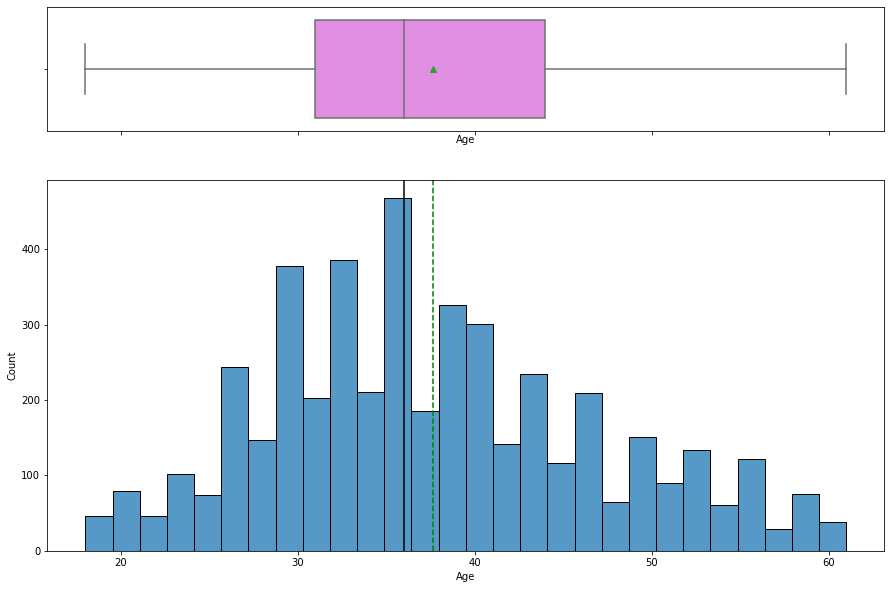

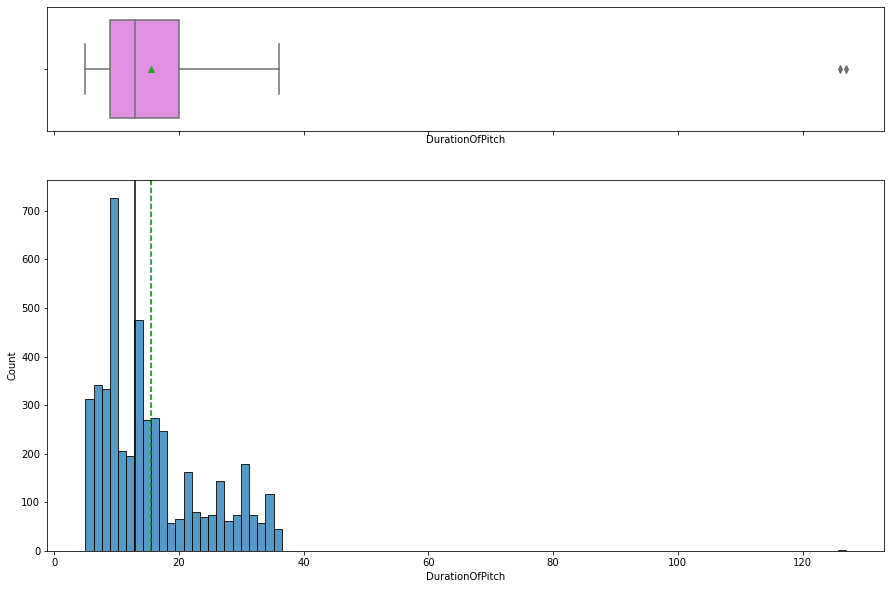

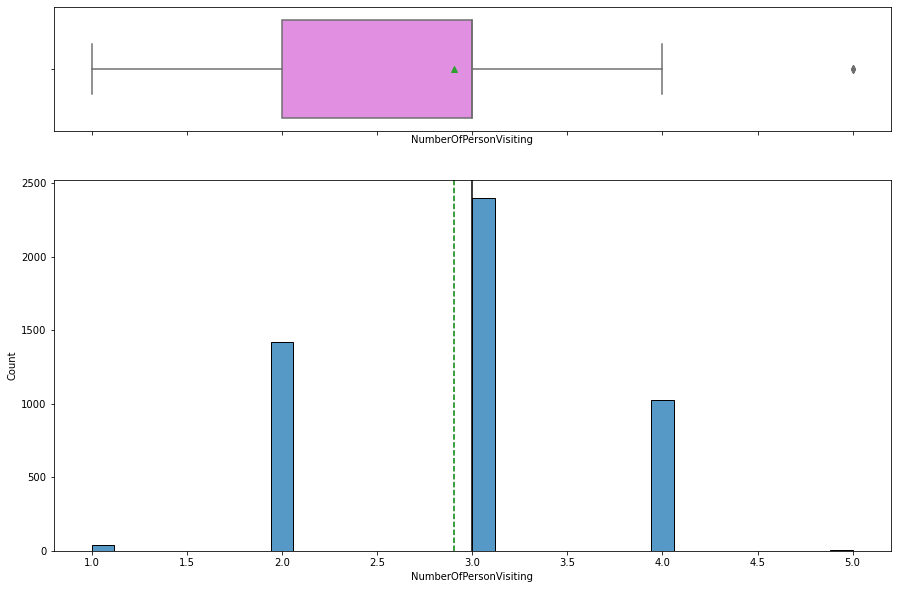

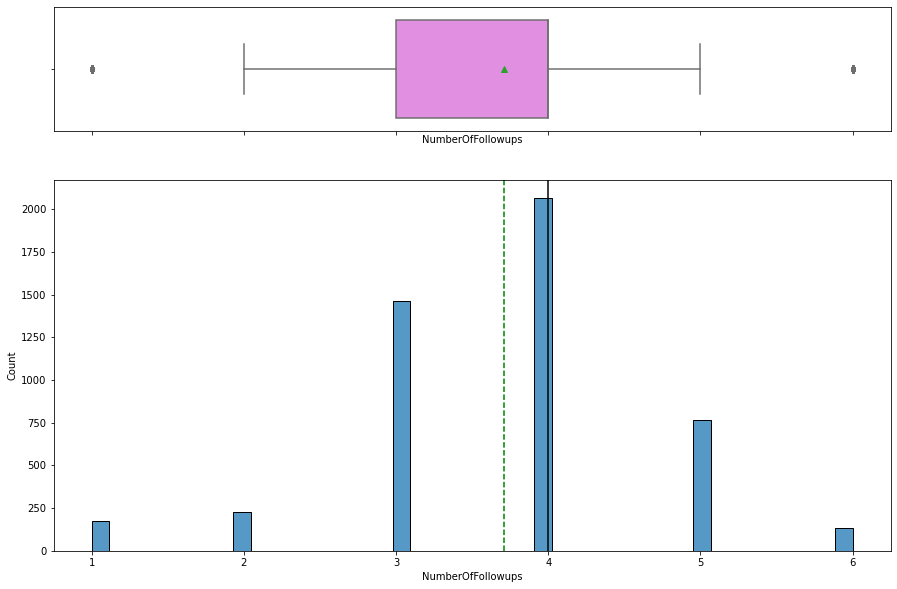

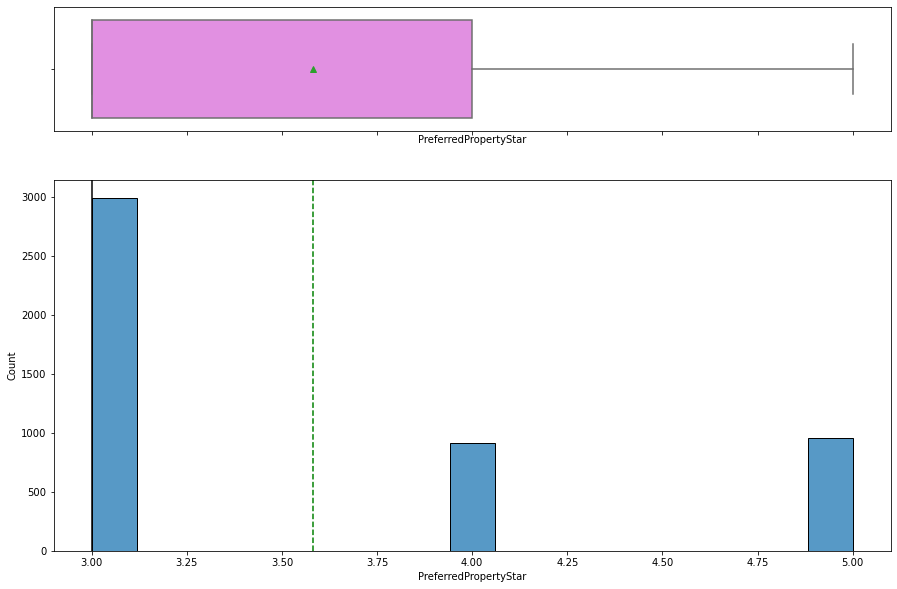

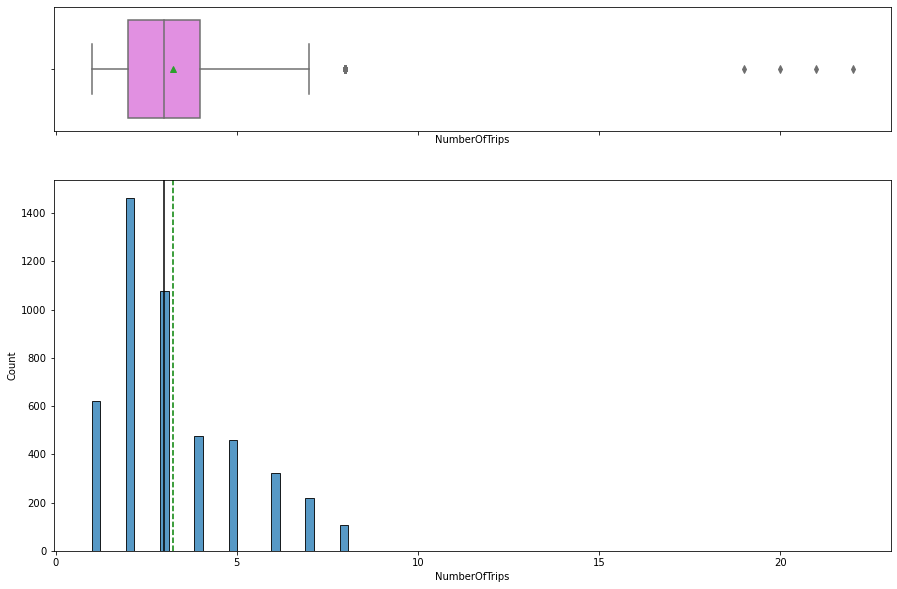

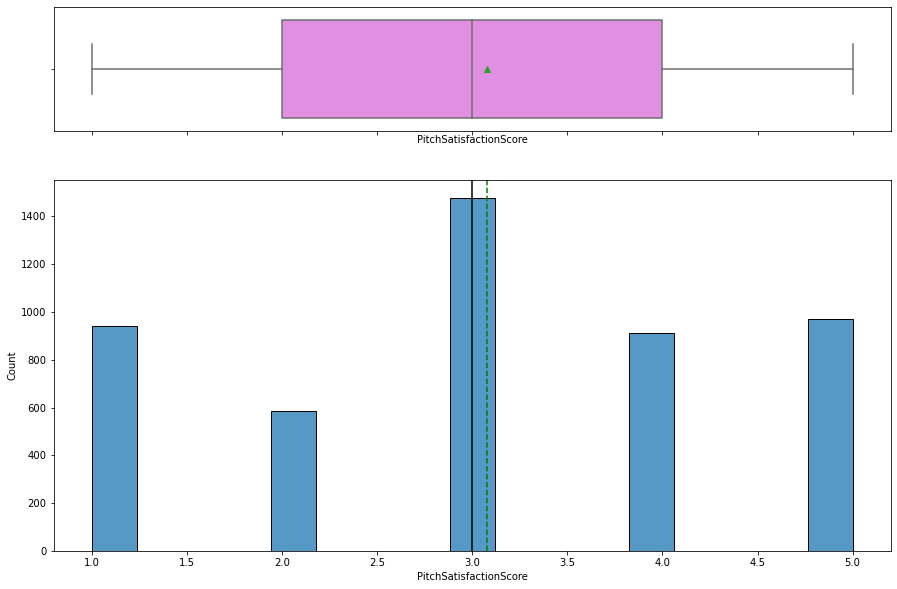

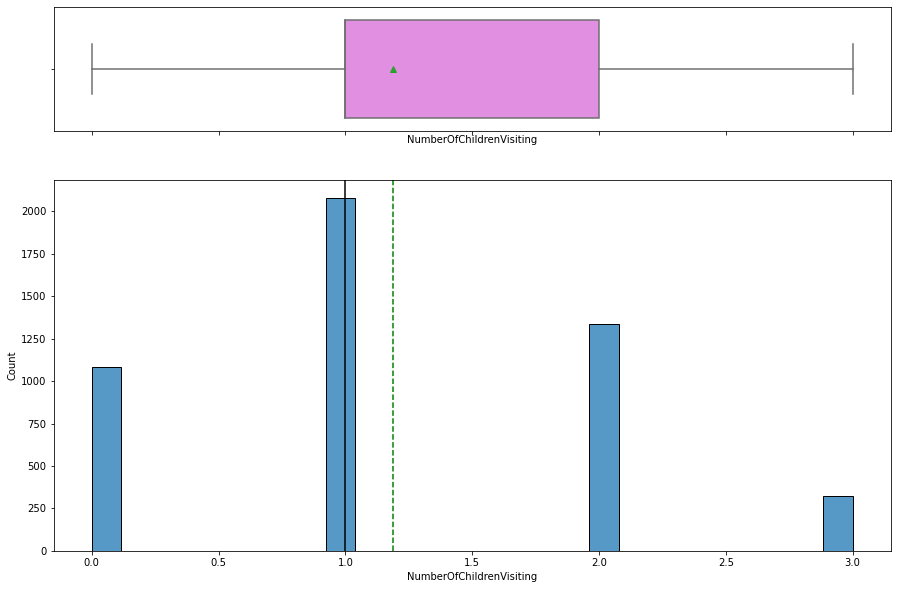

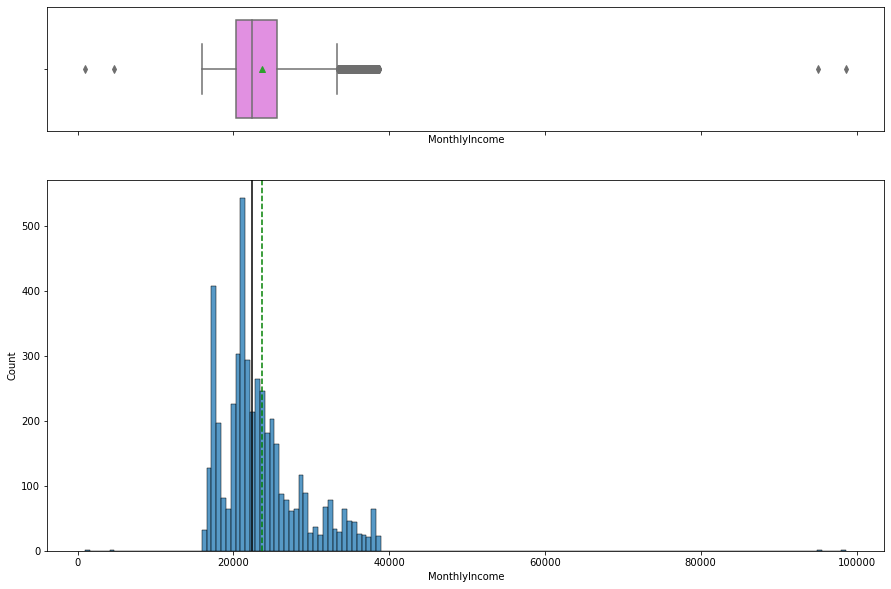

<IPython.core.display.Javascript object>

In [29]:
# select all numerical columns to understand further
num_col = [
    "Age",
    "DurationOfPitch",
    "NumberOfPersonVisiting",
    "NumberOfFollowups",
    "PreferredPropertyStar",
    "NumberOfTrips",
    "PitchSatisfactionScore",
    "NumberOfChildrenVisiting",
    "MonthlyIncome",
]
for i in range(len(num_col)):
    histogram_boxplot(data, num_col[i])

### Observation on numerical variables

* There are customers at all ages between 18 and 61.
* Most of the duration of pitch is between 6 to 10.
* The most number of person visiting is 3 members.
* The most of number of followups made is 4 times.
* The boxplot of "NumberOfFollowups" shows that there is some outliers outside the lower and upper limits.
* The distribution of number of trips shows a right skewness.
* The boxplot of NumberOfChildrenVisiting shows that there is no outliers.
* The most of Monthly income is between 20000 and 23000
* Boxplot of MonthlyIncome shows that there is outliers outside the lower and upper limits.

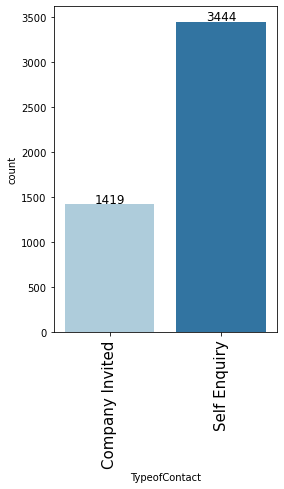

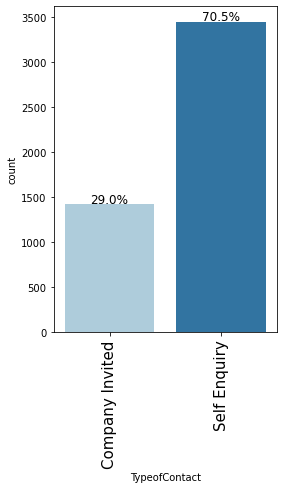

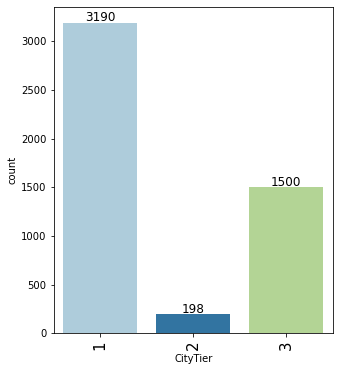

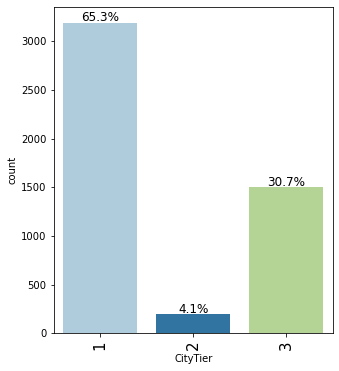

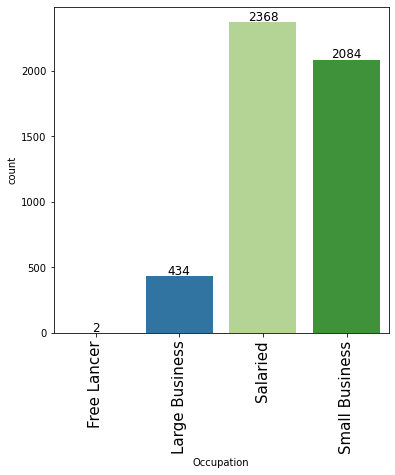

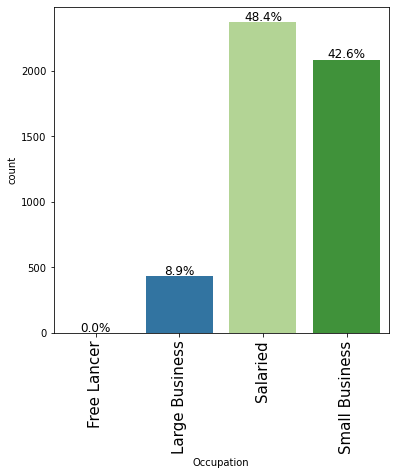

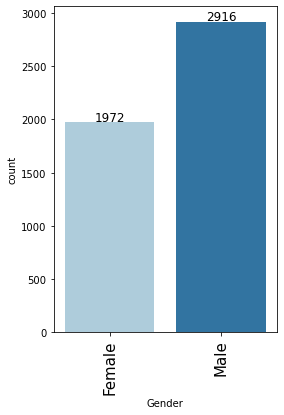

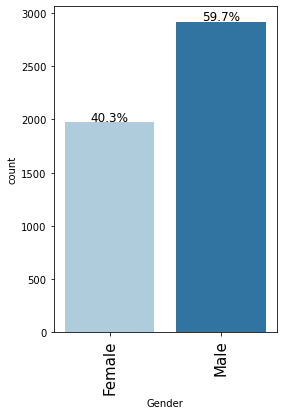

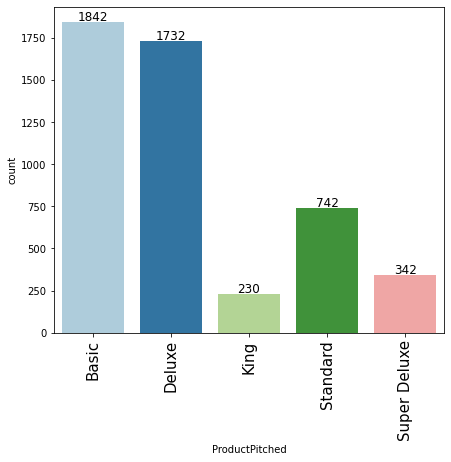

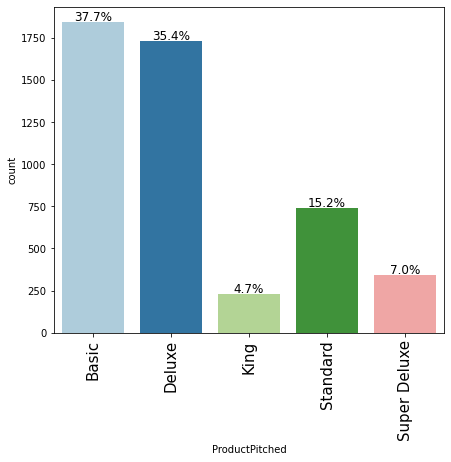

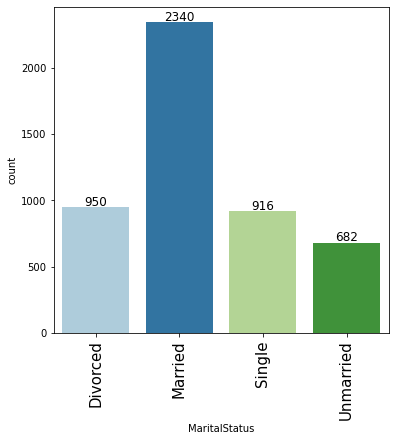

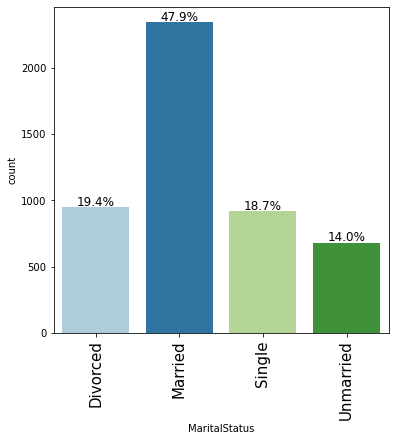

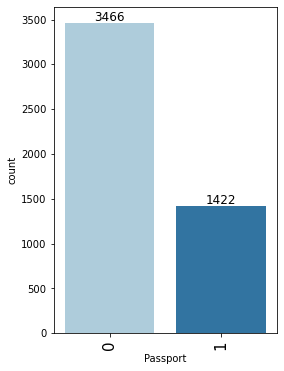

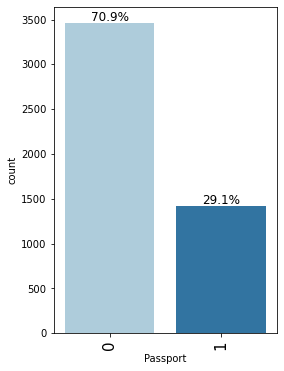

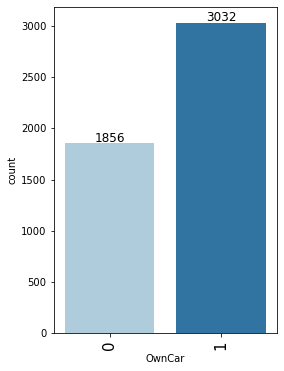

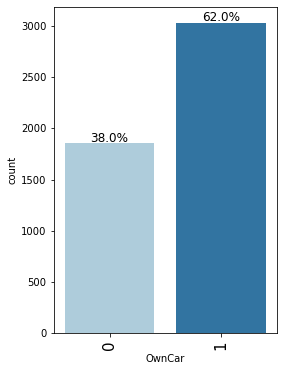

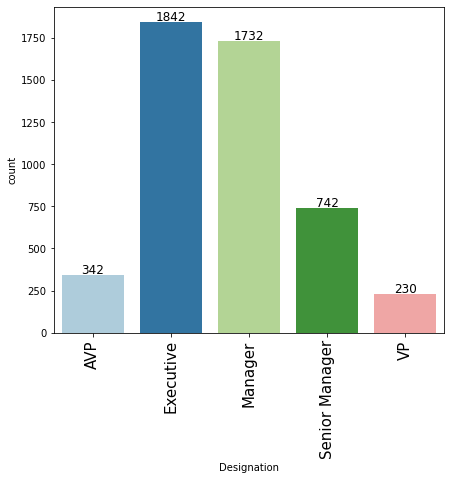

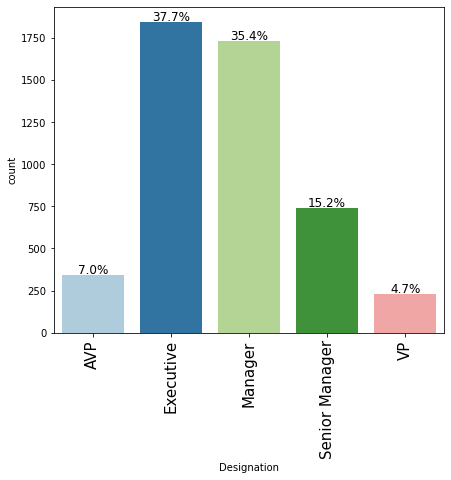

<IPython.core.display.Javascript object>

In [30]:
for i in range(len(category_col)):
    labeled_barplot(data, category_col[i])
    labeled_barplot(data, category_col[i], perc=True)

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


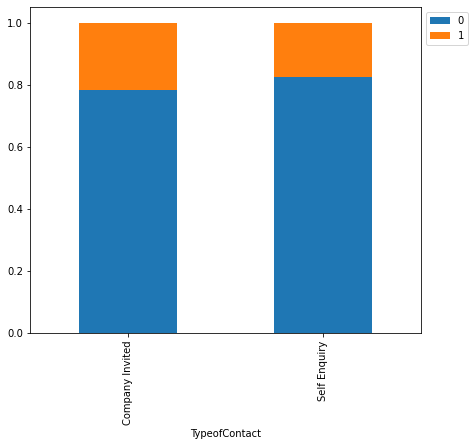

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


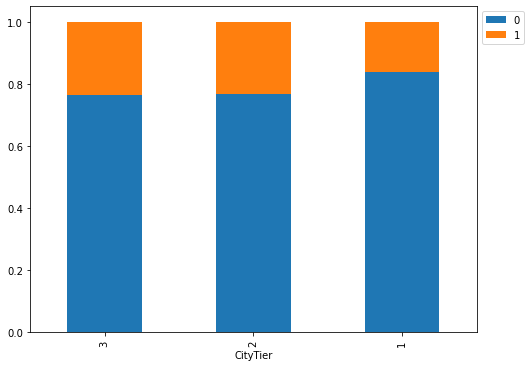

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


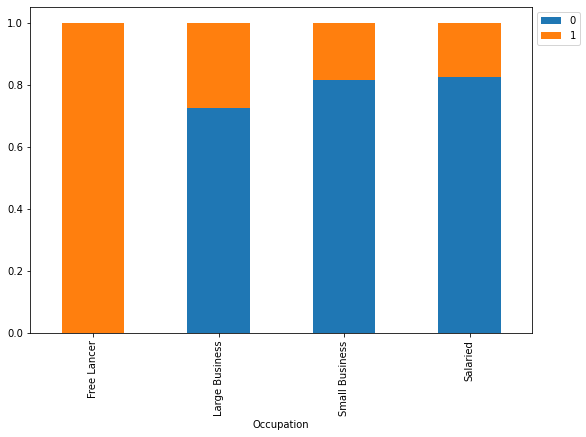

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


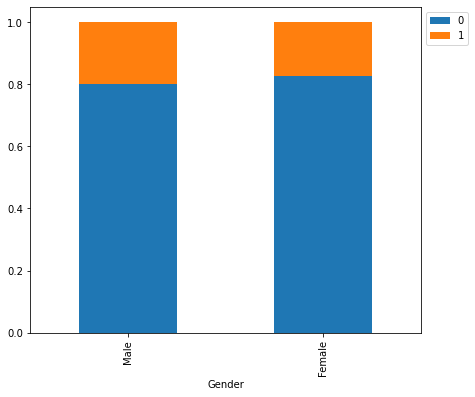

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


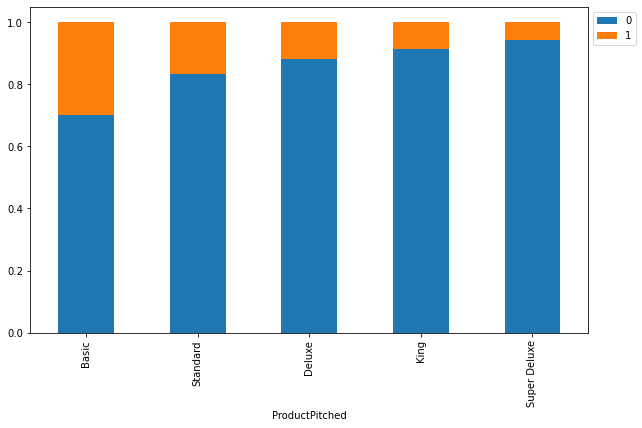

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


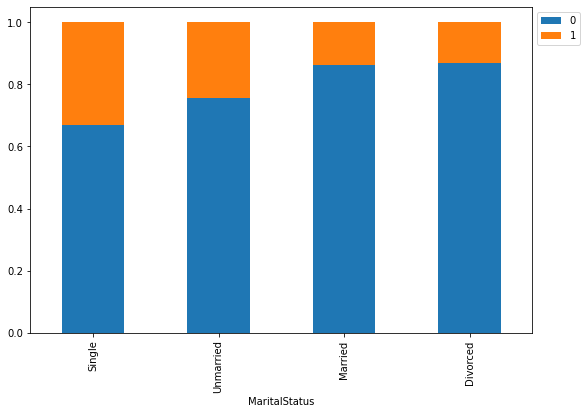

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


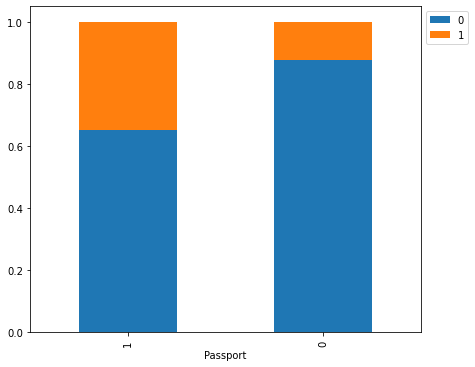

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


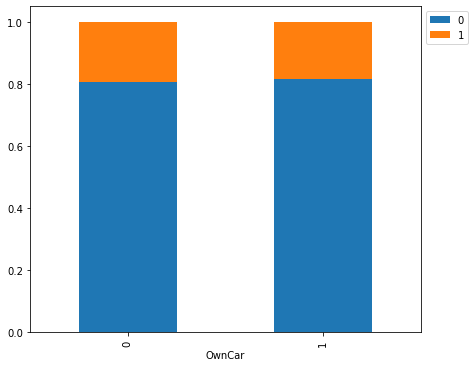

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


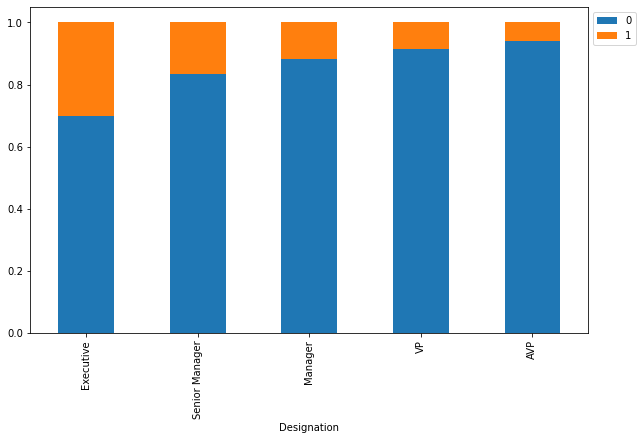

<IPython.core.display.Javascript object>

In [31]:
for i in range(len(category_col)):
    stacked_barplot(data, category_col[i], "ProdTaken")

**Observation**

* 70.5% of customer did a Self Enquiry and 29% got invite from company

* Most of customers are from City Tier 1 with 65.3%, City Tier 3 with 30.7% and then Tier2 with 4.1%

* Most of Customers are Salaried with 48.4% followed by small business with 42.6%

* Customer with large business is 8.9% and Free Lancer is 0.0% (i.e very few customers who are free Lancers)

* Male are 59.7% followed by Female with 37.2%

* The maximum product pitched is Basic (37.7%) and least is King (4.7%)

* The most of Customers are married with 47.9% followed by Divorced and Single. Least is Unmarried with 14%

## Bivariate Analysis

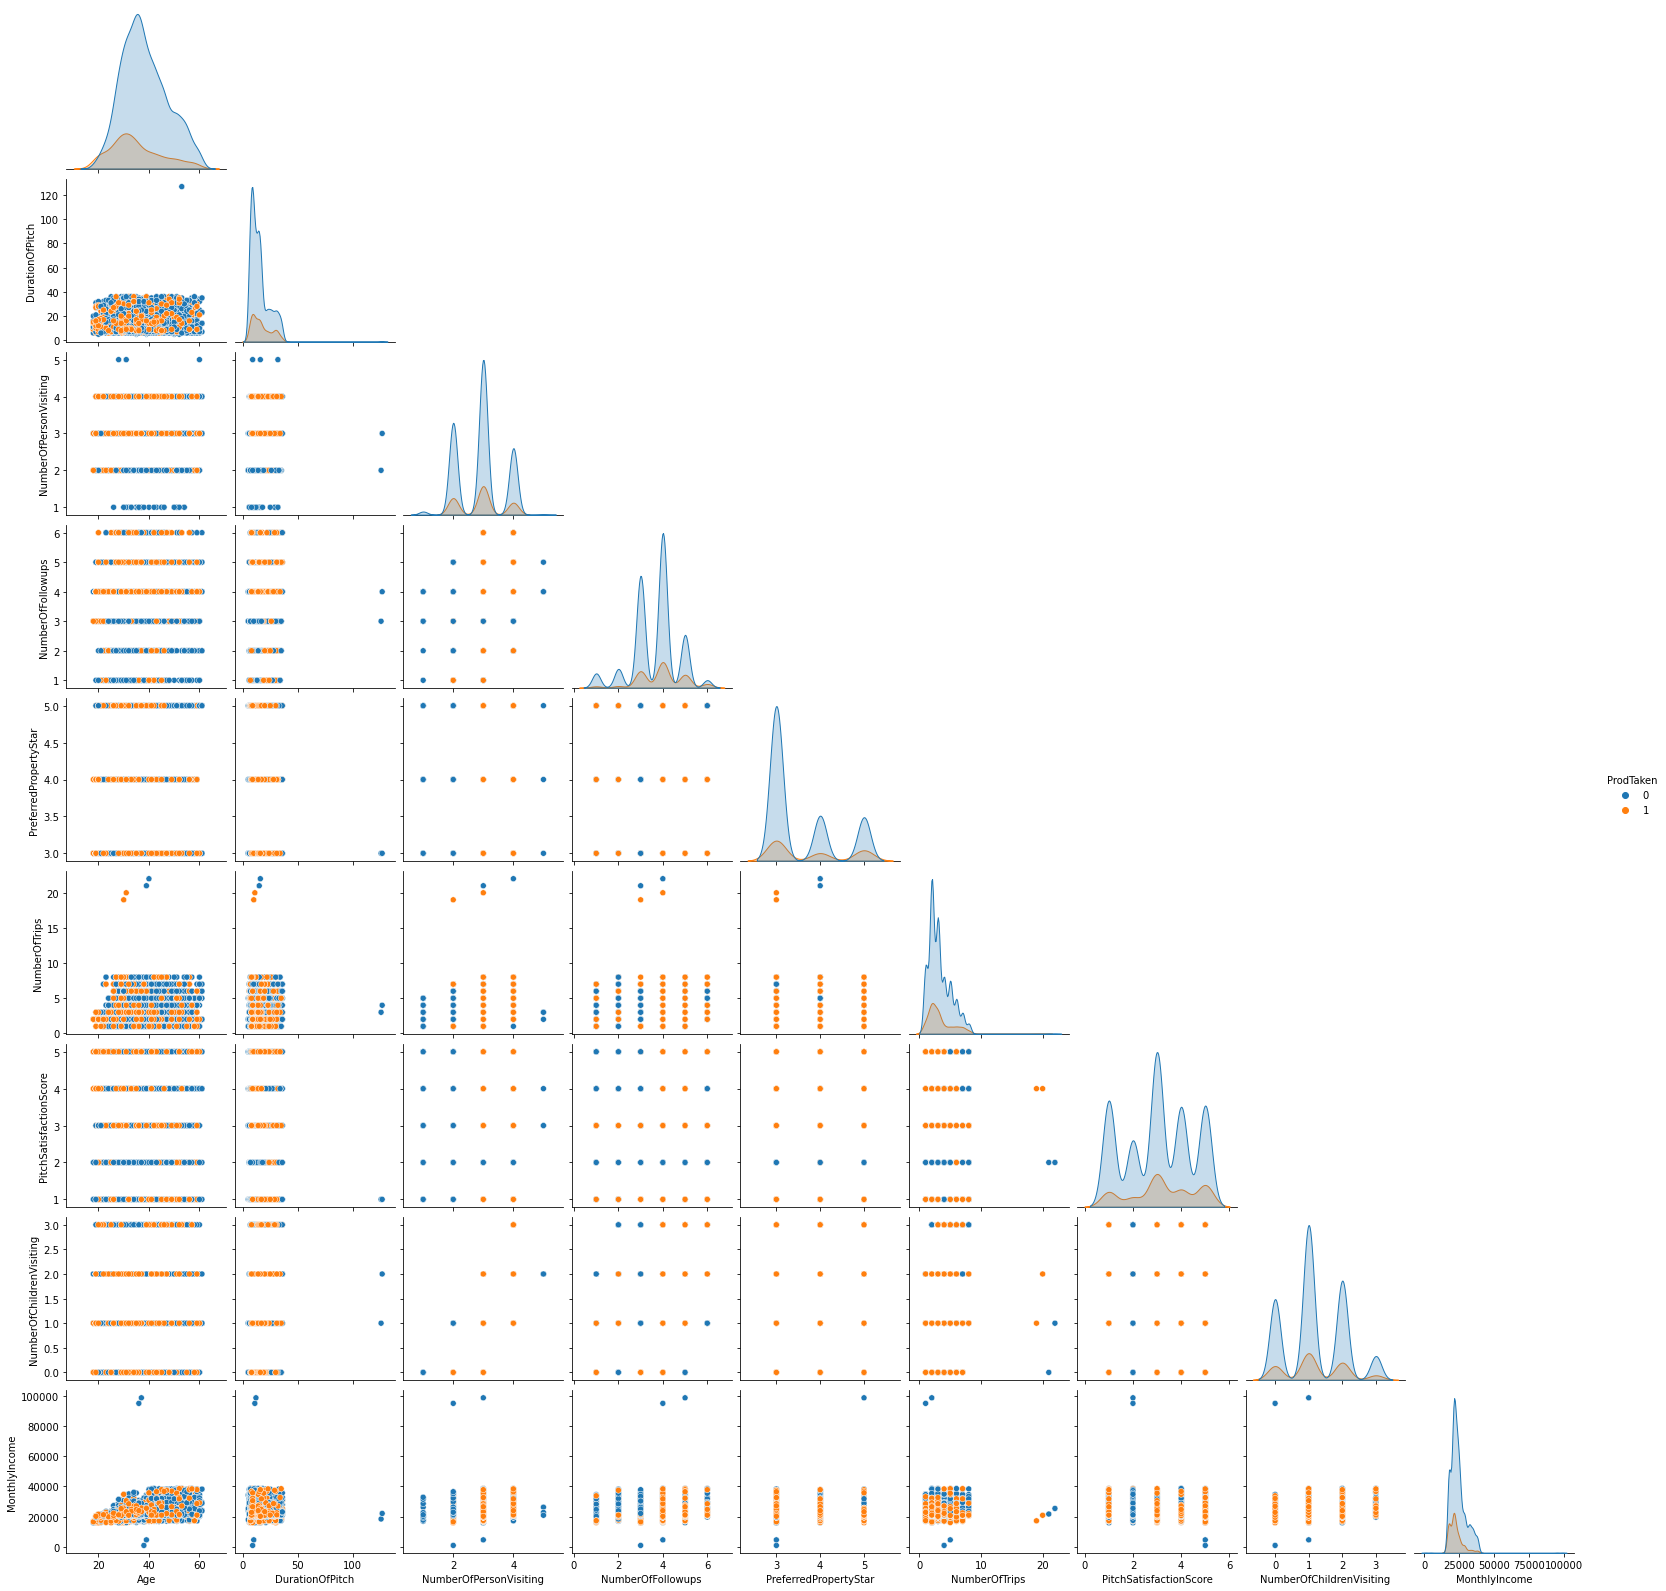

<IPython.core.display.Javascript object>

In [32]:
sns.pairplot(data, hue="ProdTaken", corner=True)

* There is no clear correlation between the features, But can see slight positive correlation between Age and Monthly income.

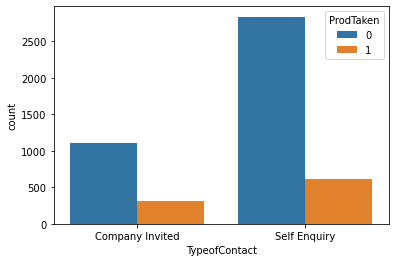

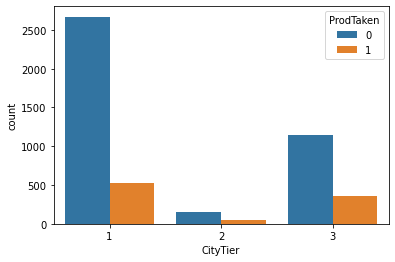

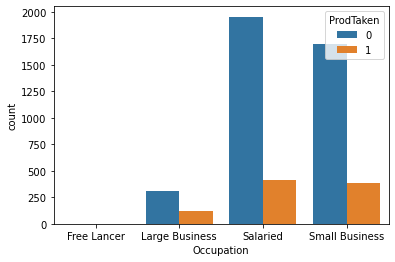

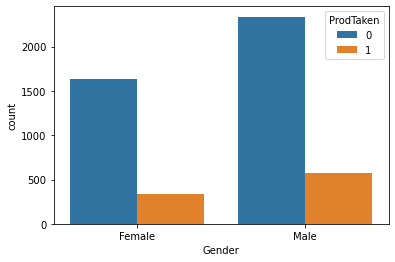

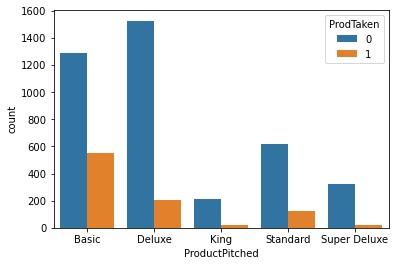

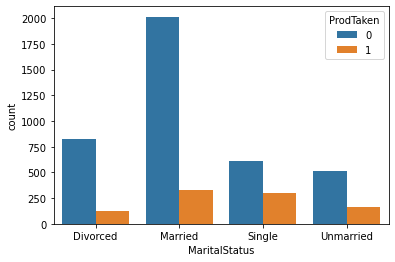

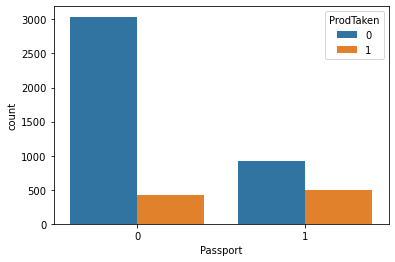

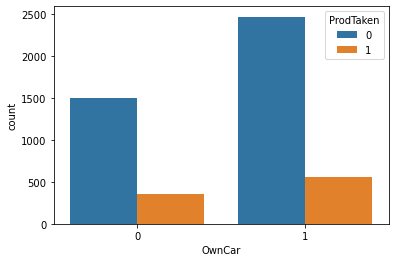

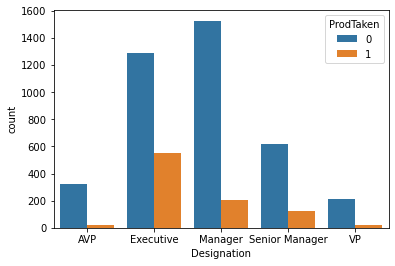

<IPython.core.display.Javascript object>

In [33]:
for i in range(len(category_col)):
    sns.countplot(data=data, x=category_col[i], hue="ProdTaken")
    plt.show()

([<matplotlib.patches.Wedge at 0x27538763af0>,
 [Text(-0.9132395442667172, 0.6131831168480741, ''),
  Text(0.9132395729718897, -0.6131830740962446, '')],
 [Text(-0.4981306605091184, 0.33446351828076765, '81.2%'),
  Text(0.49813067616648526, -0.33446349496158795, '18.8%')])

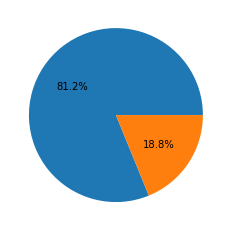

<IPython.core.display.Javascript object>

In [34]:
plt.pie(data=data, x=data["ProdTaken"].value_counts(), autopct="%1.1f%%")

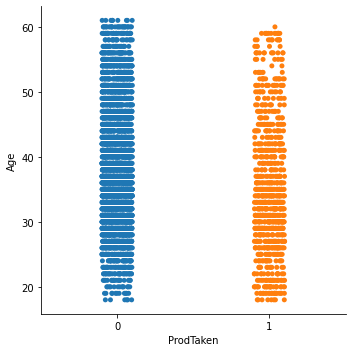

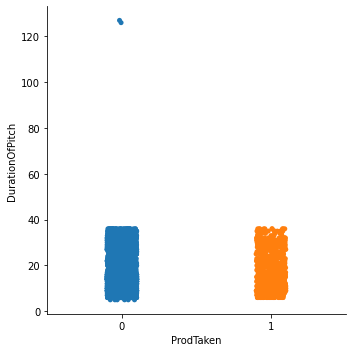

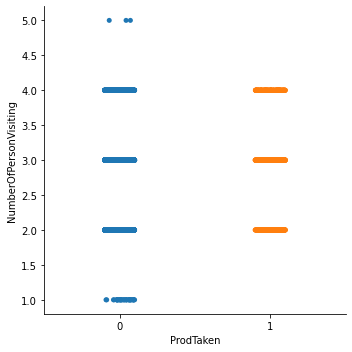

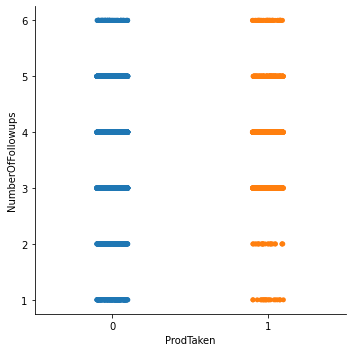

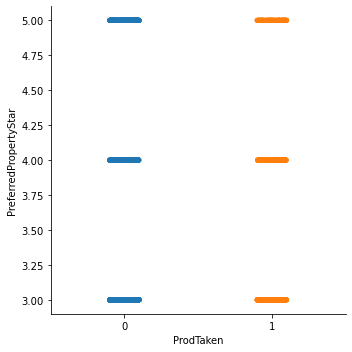

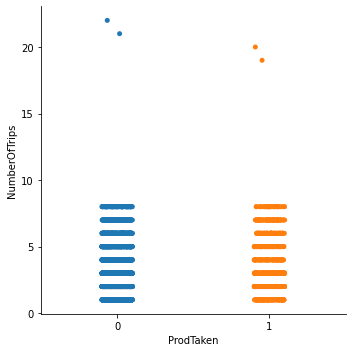

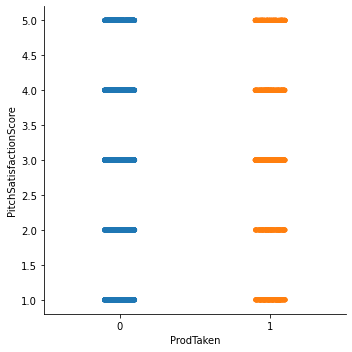

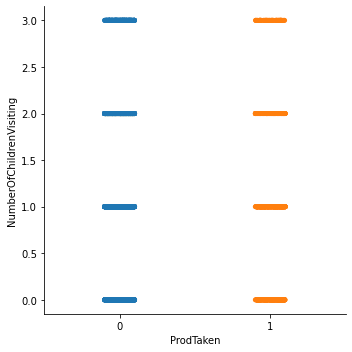

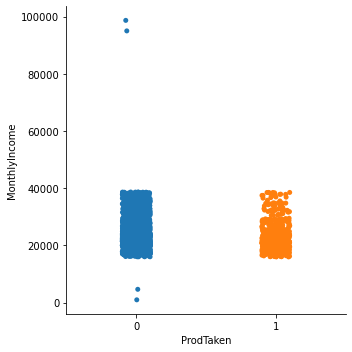

<IPython.core.display.Javascript object>

In [35]:
for i in range(len(num_col)):
    sns.catplot(x="ProdTaken", y=num_col[i], data=data)
    plt.show()

#### Age Bin and Income Bin Analysis

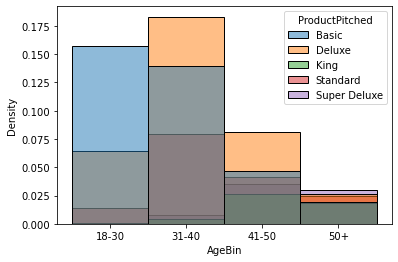

<IPython.core.display.Javascript object>

In [36]:
sns.histplot(data=data, x="AgeBin", hue="ProductPitched", stat="density")
plt.show()

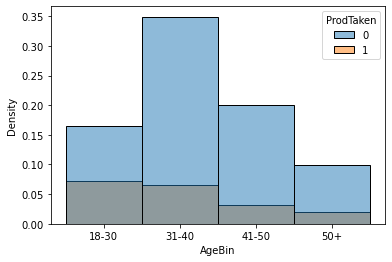

<IPython.core.display.Javascript object>

In [37]:
sns.histplot(data=data, x="AgeBin", hue="ProdTaken", stat="density")
plt.show()

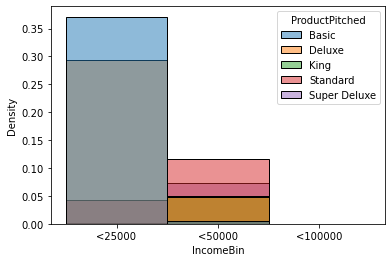

<IPython.core.display.Javascript object>

In [38]:
sns.histplot(data=data, x="IncomeBin", hue="ProductPitched", stat="density")
plt.show()

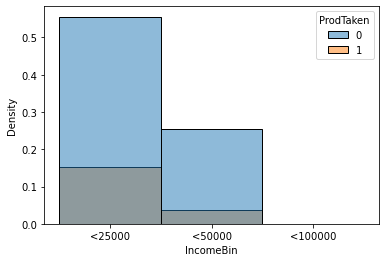

<IPython.core.display.Javascript object>

In [39]:
sns.histplot(data=data, x="IncomeBin", hue="ProdTaken", stat="density")
plt.show()

In [40]:
data.drop(
    ["AgeBin", "IncomeBin"], axis=1, inplace=True
)  # drop the AgeBin & IncomeBin columns

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

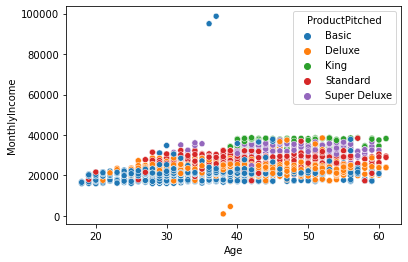

<IPython.core.display.Javascript object>

In [41]:
sns.scatterplot(data=data, x="Age", y="MonthlyIncome", hue="ProductPitched")

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

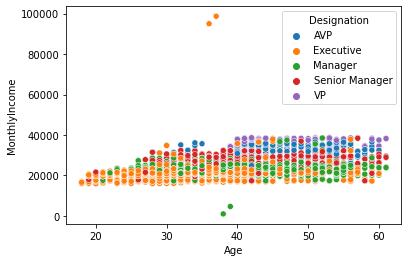

<IPython.core.display.Javascript object>

In [42]:
sns.scatterplot(data=data, x="Age", y="MonthlyIncome", hue="Designation")

<AxesSubplot:xlabel='Occupation', ylabel='MonthlyIncome'>

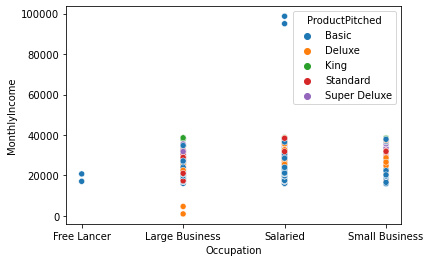

<IPython.core.display.Javascript object>

In [43]:
sns.scatterplot(data=data, x="Occupation", y="MonthlyIncome", hue="ProductPitched")

<AxesSubplot:xlabel='MaritalStatus', ylabel='MonthlyIncome'>

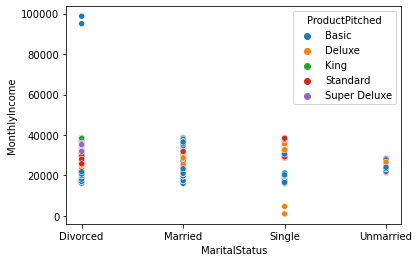

<IPython.core.display.Javascript object>

In [44]:
sns.scatterplot(data=data, x="MaritalStatus", y="MonthlyIncome", hue="ProductPitched")

<AxesSubplot:xlabel='Designation', ylabel='MonthlyIncome'>

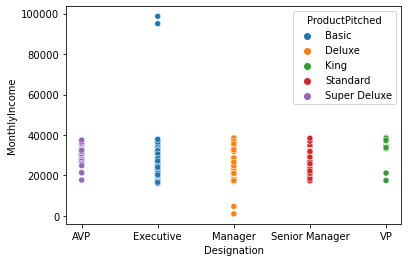

<IPython.core.display.Javascript object>

In [45]:
sns.scatterplot(data=data, x="Designation", y="MonthlyIncome", hue="ProductPitched")

### From all the above visualizations, the features can be compared and analyzed in a better way

## Customer Profiling <a class="anchor" id="cust-prof"></a>

In [46]:
data["ProdTaken"].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

<IPython.core.display.Javascript object>

**There are 920 customers who took the Package already. So understanding the customer profile will help us to build a better model. Below are the separate details of each package**

### Customer Profile for "Basic" Package

In [47]:
data_Basic = data[(data["ProductPitched"] == "Basic") & (data["ProdTaken"] == 1)]

<IPython.core.display.Javascript object>

In [48]:
data_Basic.head()

ProdTaken   Age    TypeofContact CityTier  DurationOfPitch  \
2           1  37.0     Self Enquiry        1              8.0   
14          1  28.0     Self Enquiry        1             30.0   
24          1  34.0     Self Enquiry        1             12.0   
26          1   NaN  Company Invited        1             22.0   
34          1  24.0     Self Enquiry        1              6.0   

        Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
2      Free Lancer    Male                       3                4.0   
14        Salaried    Male                       2                4.0   
24  Small Business    Male                       2                3.0   
26        Salaried  Female                       3                5.0   
34  Small Business    Male                       3                3.0   

   ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
2           Basic                    3.0        Single            7.0   
14          Basic                    3.0        Single            6.0   
24          Basic                    5.0        Single            3.0   
26          Basic                    5.0        Single            2.0   
34          Basic                    3.0      Divorced            3.0   

   Passport  PitchSatisfactionScore OwnCar  NumberOfChildrenVisiting  \
2         1                       3      0                       0.0   
14        1                       2      0                       0.0   
24        0                       2      1                       1.0   
26        1                       4      1                       2.0   
34        1                       3      1                       2.0   

   Designation  MonthlyIncome  
2    Executive        17090.0  
14   Executive        17028.0  
24   Executive        17960.0  
26   Executive            NaN  
34   Executive        17293.0

<IPython.core.display.Javascript object>

In [49]:
data_Basic.describe(include="all").T

count unique           top   freq          mean  \
ProdTaken                 552.0    NaN           NaN    NaN           1.0   
Age                       515.0    NaN           NaN    NaN      31.28932   
TypeofContact               549      2  Self Enquiry    355           NaN   
CityTier                  552.0    3.0           1.0  392.0           NaN   
DurationOfPitch           532.0    NaN           NaN    NaN     15.791353   
Occupation                  552      4      Salaried    260           NaN   
Gender                      552      2          Male    344           NaN   
NumberOfPersonVisiting    552.0    NaN           NaN    NaN      2.905797   
NumberOfFollowups         548.0    NaN           NaN    NaN       3.95073   
ProductPitched              552      1         Basic    552           NaN   
PreferredPropertyStar     552.0    NaN           NaN    NaN      3.771739   
MaritalStatus               552      4        Single    230           NaN   
NumberOfTrips             547.0    NaN           NaN    NaN      3.226691   
Passport                  552.0    2.0           1.0  322.0           NaN   
PitchSatisfactionScore    552.0    NaN           NaN    NaN      3.213768   
OwnCar                    552.0    2.0           1.0  316.0           NaN   
NumberOfChildrenVisiting  551.0    NaN           NaN    NaN      1.221416   
Designation                 552      1     Executive    552           NaN   
MonthlyIncome             529.0    NaN           NaN    NaN  20161.529301   

                                  std      min      25%      50%      75%  \
ProdTaken                         0.0      1.0      1.0      1.0      1.0   
Age                          9.070829     18.0     25.0     30.0     35.0   
TypeofContact                     NaN      NaN      NaN      NaN      NaN   
CityTier                          NaN      NaN      NaN      NaN      NaN   
DurationOfPitch              7.906926      6.0      9.0     14.0     22.0   
Occupation                        NaN      NaN      NaN      NaN      NaN   
Gender                            NaN      NaN      NaN      NaN      NaN   
NumberOfPersonVisiting       0.701439      2.0      2.0      3.0      3.0   
NumberOfFollowups            0.967166      1.0      3.0      4.0      5.0   
ProductPitched                    NaN      NaN      NaN      NaN      NaN   
PreferredPropertyStar        0.861812      3.0      3.0      3.0      5.0   
MaritalStatus                     NaN      NaN      NaN      NaN      NaN   
NumberOfTrips                2.081618      1.0      2.0      3.0      4.0   
Passport                          NaN      NaN      NaN      NaN      NaN   
PitchSatisfactionScore       1.353074      1.0      2.0      3.0      4.0   
OwnCar                            NaN      NaN      NaN      NaN      NaN   
NumberOfChildrenVisiting     0.866537      0.0      1.0      1.0      2.0   
Designation                       NaN      NaN      NaN      NaN      NaN   
MonthlyIncome             3313.289684  16009.0  17546.0  20582.0  21394.0   

                              max  
ProdTaken                     1.0  
Age                          59.0  
TypeofContact                 NaN  
CityTier                      NaN  
DurationOfPitch              36.0  
Occupation                    NaN  
Gender                        NaN  
NumberOfPersonVisiting        4.0  
NumberOfFollowups             6.0  
ProductPitched                NaN  
PreferredPropertyStar         5.0  
MaritalStatus                 NaN  
NumberOfTrips                20.0  
Passport                      NaN  
PitchSatisfactionScore        5.0  
OwnCar                        NaN  
NumberOfChildrenVisiting      3.0  
Designation                   NaN  
MonthlyIncome             37868.0

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

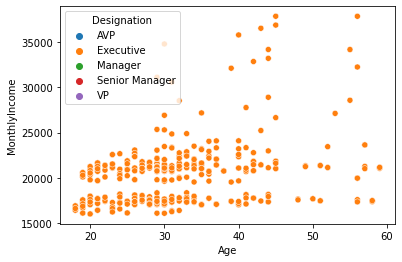

<IPython.core.display.Javascript object>

In [50]:
sns.scatterplot(data=data_Basic, x="Age", y="MonthlyIncome", hue="Designation")

<AxesSubplot:xlabel='MaritalStatus', ylabel='MonthlyIncome'>

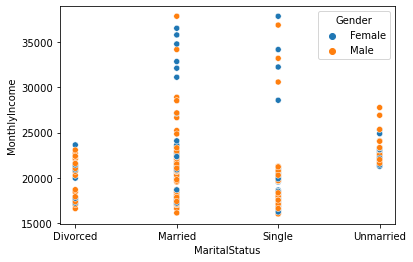

<IPython.core.display.Javascript object>

In [51]:
sns.scatterplot(data=data_Basic, x="MaritalStatus", y="MonthlyIncome", hue="Gender")

### Observation on Basic Package Customer Profile

* Age Group: Range between 18 -59
* Contacted by: Self
* Gender: Male
* City Tier: 1
* Occupation: Mostly Salaried
* Marital Status: Mostly Single
* Designation: All are Executives
* Monthly Income: Avg ~20K (<25K)

### Customer Profile for "Standard" Package

In [52]:
data_Standard = data[(data["ProductPitched"] == "Standard") & (data["ProdTaken"] == 1)]

<IPython.core.display.Javascript object>

In [53]:
data_Standard.head()

ProdTaken   Age    TypeofContact CityTier  DurationOfPitch  \
50           1  48.0     Self Enquiry        1              6.0   
89           1  46.0     Self Enquiry        3             15.0   
126          1  58.0     Self Enquiry        1             29.0   
136          1  51.0  Company Invited        1             14.0   
205          1  29.0     Self Enquiry        3             33.0   

         Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
50         Salaried    Male                       3                4.0   
89   Small Business    Male                       3                4.0   
126  Small Business  Female                       3                3.0   
136        Salaried    Male                       2                5.0   
205  Small Business  Female                       2                3.0   

    ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
50        Standard                    3.0        Single            1.0   
89        Standard                    3.0     Unmarried            2.0   
126       Standard                    3.0      Divorced            2.0   
136       Standard                    3.0     Unmarried            3.0   
205       Standard                    3.0      Divorced            2.0   

    Passport  PitchSatisfactionScore OwnCar  NumberOfChildrenVisiting  \
50         1                       5      0                       2.0   
89         0                       5      0                       1.0   
126        0                       3      1                       0.0   
136        0                       2      0                       1.0   
205        0                       3      1                       1.0   

        Designation  MonthlyIncome  
50   Senior Manager        20381.0  
89   Senior Manager        24619.0  
126  Senior Manager        25312.0  
136  Senior Manager        25650.0  
205  Senior Manager        22639.0

<IPython.core.display.Javascript object>

In [54]:
data_Standard.describe(include="all").T

count unique             top  freq          mean  \
ProdTaken                 124.0    NaN             NaN   NaN           1.0   
Age                       123.0    NaN             NaN   NaN      41.00813   
TypeofContact               124      2    Self Enquiry    92           NaN   
CityTier                  124.0    3.0             3.0  64.0           NaN   
DurationOfPitch           123.0    NaN             NaN   NaN     19.065041   
Occupation                  124      3  Small Business    58           NaN   
Gender                      124      2            Male    76           NaN   
NumberOfPersonVisiting    124.0    NaN             NaN   NaN      2.967742   
NumberOfFollowups         124.0    NaN             NaN   NaN      3.935484   
ProductPitched              124      1        Standard   124           NaN   
PreferredPropertyStar     123.0    NaN             NaN   NaN      3.731707   
MaritalStatus               124      4         Married    56           NaN   
NumberOfTrips             123.0    NaN             NaN   NaN       3.01626   
Passport                  124.0    2.0             0.0  76.0           NaN   
PitchSatisfactionScore    124.0    NaN             NaN   NaN      3.467742   
OwnCar                    124.0    2.0             1.0  82.0           NaN   
NumberOfChildrenVisiting  123.0    NaN             NaN   NaN      1.121951   
Designation                 124      1  Senior Manager   124           NaN   
MonthlyIncome             124.0    NaN             NaN   NaN  26035.419355   

                                  std      min       25%      50%      75%  \
ProdTaken                         0.0      1.0       1.0      1.0      1.0   
Age                          9.876695     19.0      33.0     38.0     49.0   
TypeofContact                     NaN      NaN       NaN      NaN      NaN   
CityTier                          NaN      NaN       NaN      NaN      NaN   
DurationOfPitch              9.048811      6.0      11.0     17.0     29.0   
Occupation                        NaN      NaN       NaN      NaN      NaN   
Gender                            NaN      NaN       NaN      NaN      NaN   
NumberOfPersonVisiting       0.709236      2.0       2.0      3.0      3.0   
NumberOfFollowups            0.908335      1.0       3.0      4.0     4.25   
ProductPitched                    NaN      NaN       NaN      NaN      NaN   
PreferredPropertyStar         0.87846      3.0       3.0      3.0      5.0   
MaritalStatus                     NaN      NaN       NaN      NaN      NaN   
NumberOfTrips                1.815163      1.0       2.0      2.0      4.0   
Passport                          NaN      NaN       NaN      NaN      NaN   
PitchSatisfactionScore        1.30935      1.0       3.0      3.0      5.0   
OwnCar                            NaN      NaN       NaN      NaN      NaN   
NumberOfChildrenVisiting     0.901596      0.0       0.0      1.0      2.0   
Designation                       NaN      NaN       NaN      NaN      NaN   
MonthlyIncome             3593.290353  17372.0  23974.75  25711.0  28628.0   

                              max  
ProdTaken                     1.0  
Age                          60.0  
TypeofContact                 NaN  
CityTier                      NaN  
DurationOfPitch              36.0  
Occupation                    NaN  
Gender                        NaN  
NumberOfPersonVisiting        4.0  
NumberOfFollowups             6.0  
ProductPitched                NaN  
PreferredPropertyStar         5.0  
MaritalStatus                 NaN  
NumberOfTrips                 8.0  
Passport                      NaN  
PitchSatisfactionScore        5.0  
OwnCar                        NaN  
NumberOfChildrenVisiting      3.0  
Designation                   NaN  
MonthlyIncome             38395.0

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

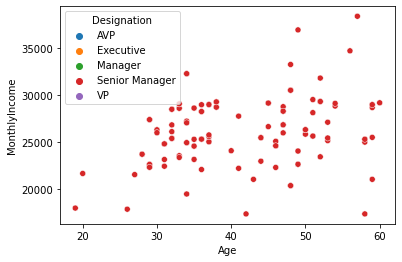

<IPython.core.display.Javascript object>

In [55]:
sns.scatterplot(data=data_Standard, x="Age", y="MonthlyIncome", hue="Designation")

<AxesSubplot:xlabel='MaritalStatus', ylabel='MonthlyIncome'>

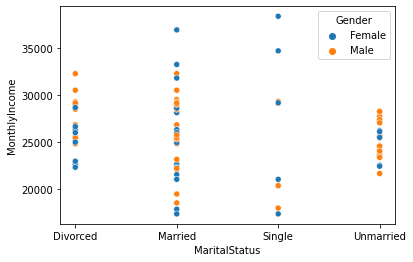

<IPython.core.display.Javascript object>

In [56]:
sns.scatterplot(data=data_Standard, x="MaritalStatus", y="MonthlyIncome", hue="Gender")

### Observation on Standard Package Customer Profile

* Age Group: Avg 41
* Contacted by: Self
* Gender: Male
* City Tier: 3
* Occupation: Mostly Small Business
* Marital Status: Mostly Married
* Designation: All are Senior Manager
* Monthly Income: Avg ~25K (<30K)

### Customer Profile for "Deluxe" Package

In [57]:
data_Deluxe = data[(data["ProductPitched"] == "Deluxe") & (data["ProdTaken"] == 1)]

<IPython.core.display.Javascript object>

In [58]:
data_Deluxe.head()

ProdTaken   Age    TypeofContact CityTier  DurationOfPitch  \
0            1  41.0     Self Enquiry        3              6.0   
21           1   NaN     Self Enquiry        3             15.0   
33           1  39.0     Self Enquiry        3             11.0   
107          1  25.0     Self Enquiry        3             11.0   
111          1  34.0  Company Invited        1             13.0   

         Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0          Salaried  Female                       3                3.0   
21         Salaried    Male                       2                4.0   
33   Large Business    Male                       2                3.0   
107  Small Business    Male                       2                4.0   
111        Salaried    Male                       3                5.0   

    ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0           Deluxe                    3.0        Single            1.0   
21          Deluxe                    5.0        Single            1.0   
33          Deluxe                    3.0      Divorced            4.0   
107         Deluxe                    3.0        Single            2.0   
111         Deluxe                    3.0        Single            2.0   

    Passport  PitchSatisfactionScore OwnCar  NumberOfChildrenVisiting  \
0          1                       2      1                       0.0   
21         0                       2      0                       0.0   
33         0                       2      0                       1.0   
107        1                       3      1                       0.0   
111        1                       5      1                       1.0   

    Designation  MonthlyIncome  
0       Manager        20993.0  
21      Manager        18407.0  
33      Manager        17086.0  
107     Manager        20744.0  
111     Manager        21074.0

<IPython.core.display.Javascript object>

In [59]:
data_Deluxe.describe(include="all").T

count unique             top   freq          mean  \
ProdTaken                 204.0    NaN             NaN    NaN           1.0   
Age                       198.0    NaN             NaN    NaN     37.641414   
TypeofContact               204      2    Self Enquiry    136           NaN   
CityTier                  204.0    2.0             3.0  144.0           NaN   
DurationOfPitch           180.0    NaN             NaN    NaN          19.1   
Occupation                  204      3  Small Business    108           NaN   
Gender                      204      2            Male    134           NaN   
NumberOfPersonVisiting    204.0    NaN             NaN    NaN       2.95098   
NumberOfFollowups         200.0    NaN             NaN    NaN          3.97   
ProductPitched              204      1          Deluxe    204           NaN   
PreferredPropertyStar     203.0    NaN             NaN    NaN      3.699507   
MaritalStatus               204      4         Married     68           NaN   
NumberOfTrips             202.0    NaN             NaN    NaN       3.70297   
Passport                  204.0    2.0             0.0  104.0           NaN   
PitchSatisfactionScore    204.0    NaN             NaN    NaN      3.039216   
OwnCar                    204.0    2.0             1.0  124.0           NaN   
NumberOfChildrenVisiting  203.0    NaN             NaN    NaN      1.172414   
Designation                 204      1         Manager    204           NaN   
MonthlyIncome             195.0    NaN             NaN    NaN  23106.215385   

                                  std      min      25%      50%      75%  \
ProdTaken                         0.0      1.0      1.0      1.0      1.0   
Age                          8.469575     21.0     32.0     35.5     44.0   
TypeofContact                     NaN      NaN      NaN      NaN      NaN   
CityTier                          NaN      NaN      NaN      NaN      NaN   
DurationOfPitch              9.227176      6.0     11.0     16.0     28.0   
Occupation                        NaN      NaN      NaN      NaN      NaN   
Gender                            NaN      NaN      NaN      NaN      NaN   
NumberOfPersonVisiting       0.707141      2.0      2.0      3.0      3.0   
NumberOfFollowups            1.051011      1.0      3.0      4.0      5.0   
ProductPitched                    NaN      NaN      NaN      NaN      NaN   
PreferredPropertyStar        0.857899      3.0      3.0      3.0      5.0   
MaritalStatus                     NaN      NaN      NaN      NaN      NaN   
NumberOfTrips                2.022483      1.0      2.0      3.0      5.0   
Passport                          NaN      NaN      NaN      NaN      NaN   
PitchSatisfactionScore        1.27825      1.0      2.0      3.0      4.0   
OwnCar                            NaN      NaN      NaN      NaN      NaN   
NumberOfChildrenVisiting     0.841279      0.0      1.0      1.0      2.0   
Designation                       NaN      NaN      NaN      NaN      NaN   
MonthlyIncome             3592.466947  17086.0  20744.0  23186.0  24506.0   

                              max  
ProdTaken                     1.0  
Age                          59.0  
TypeofContact                 NaN  
CityTier                      NaN  
DurationOfPitch              36.0  
Occupation                    NaN  
Gender                        NaN  
NumberOfPersonVisiting        4.0  
NumberOfFollowups             6.0  
ProductPitched                NaN  
PreferredPropertyStar         5.0  
MaritalStatus                 NaN  
NumberOfTrips                 8.0  
Passport                      NaN  
PitchSatisfactionScore        5.0  
OwnCar                        NaN  
NumberOfChildrenVisiting      3.0  
Designation                   NaN  
MonthlyIncome             38525.0

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

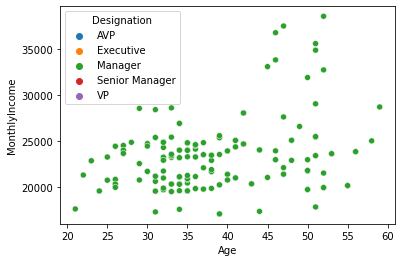

<IPython.core.display.Javascript object>

In [60]:
sns.scatterplot(data=data_Deluxe, x="Age", y="MonthlyIncome", hue="Designation")

<AxesSubplot:xlabel='MaritalStatus', ylabel='MonthlyIncome'>

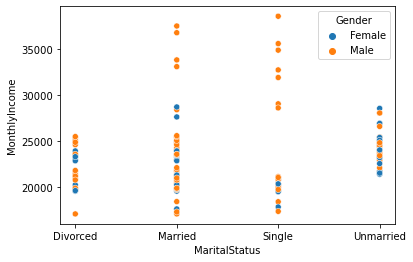

<IPython.core.display.Javascript object>

In [61]:
sns.scatterplot(data=data_Deluxe, x="MaritalStatus", y="MonthlyIncome", hue="Gender")

### Observation on Deluxe Package Customer Profile

* Age Group: Avg 37
* Contacted by: Self
* Gender: Male
* City Tier: 3
* Occupation: Mostly Small Business
* Marital Status: Mostly Married
* Designation: All are Manager
* Monthly Income: Avg ~23K (<30K)

### Customer Profile for "Super Deluxe" Package

In [62]:
data_SuperDeluxe = data[
    (data["ProductPitched"] == "Super Deluxe") & (data["ProdTaken"] == 1)
]

<IPython.core.display.Javascript object>

In [63]:
data_SuperDeluxe.head()

ProdTaken   Age    TypeofContact CityTier  DurationOfPitch  \
706           1  40.0  Company Invited        3             30.0   
813           1  39.0  Company Invited        1              8.0   
838           1  42.0  Company Invited        3             18.0   
975           1  55.0     Self Enquiry        3             19.0   
1223          1  47.0  Company Invited        3             15.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
706         Salaried  Female                       3                1.0   
813         Salaried    Male                       2                3.0   
838         Salaried    Male                       2                3.0   
975   Small Business    Male                       2                1.0   
1223        Salaried    Male                       2                5.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
706    Super Deluxe                    4.0     Unmarried            5.0   
813    Super Deluxe                    3.0       Married            1.0   
838    Super Deluxe                    5.0        Single            1.0   
975    Super Deluxe                    3.0        Single            7.0   
1223   Super Deluxe                    3.0       Married            1.0   

     Passport  PitchSatisfactionScore OwnCar  NumberOfChildrenVisiting  \
706         1                       3      1                       2.0   
813         0                       3      1                       0.0   
838         1                       5      1                       1.0   
975         1                       3      1                       1.0   
1223        0                       5      1                       1.0   

     Designation  MonthlyIncome  
706          AVP        28194.0  
813          AVP        27169.0  
838          AVP        28758.0  
975          AVP        28695.0  
1223         AVP        27936.0

<IPython.core.display.Javascript object>

In [64]:
data_SuperDeluxe.describe(include="all").T

count unique              top  freq      mean  \
ProdTaken                 20.0    NaN              NaN   NaN       1.0   
Age                       20.0    NaN              NaN   NaN      43.5   
TypeofContact               20      2  Company Invited    16       NaN   
CityTier                  20.0    2.0              3.0  16.0       NaN   
DurationOfPitch           20.0    NaN              NaN   NaN      18.5   
Occupation                  20      2         Salaried    16       NaN   
Gender                      20      2             Male    16       NaN   
NumberOfPersonVisiting    20.0    NaN              NaN   NaN       2.7   
NumberOfFollowups         20.0    NaN              NaN   NaN       3.1   
ProductPitched              20      1     Super Deluxe    20       NaN   
PreferredPropertyStar     20.0    NaN              NaN   NaN       3.6   
MaritalStatus               20      3           Single    10       NaN   
NumberOfTrips             19.0    NaN              NaN   NaN  3.263158   
Passport                  20.0    2.0              1.0  12.0       NaN   
PitchSatisfactionScore    20.0    NaN              NaN   NaN       3.8   
OwnCar                    20.0    1.0              1.0  20.0       NaN   
NumberOfChildrenVisiting  20.0    NaN              NaN   NaN       1.2   
Designation                 20      1              AVP    20       NaN   
MonthlyIncome             20.0    NaN              NaN   NaN   29823.8   

                                  std      min      25%      50%       75%  \
ProdTaken                         0.0      1.0      1.0      1.0       1.0   
Age                           4.83953     39.0     40.0     42.0     45.25   
TypeofContact                     NaN      NaN      NaN      NaN       NaN   
CityTier                          NaN      NaN      NaN      NaN       NaN   
DurationOfPitch              7.330542      8.0     15.0     18.5      20.0   
Occupation                        NaN      NaN      NaN      NaN       NaN   
Gender                            NaN      NaN      NaN      NaN       NaN   
NumberOfPersonVisiting       0.656947      2.0      2.0      3.0       3.0   
NumberOfFollowups            1.618967      1.0      2.0      3.0       4.0   
ProductPitched                    NaN      NaN      NaN      NaN       NaN   
PreferredPropertyStar        0.820783      3.0      3.0      3.0       4.0   
MaritalStatus                     NaN      NaN      NaN      NaN       NaN   
NumberOfTrips                2.490919      1.0      1.0      2.0       5.5   
Passport                          NaN      NaN      NaN      NaN       NaN   
PitchSatisfactionScore       1.005249      3.0      3.0      3.0       5.0   
OwnCar                            NaN      NaN      NaN      NaN       NaN   
NumberOfChildrenVisiting     0.833509      0.0      1.0      1.0       2.0   
Designation                       NaN      NaN      NaN      NaN       NaN   
MonthlyIncome             3520.426404  21151.0  28129.5  29802.5  31997.25   

                              max  
ProdTaken                     1.0  
Age                          56.0  
TypeofContact                 NaN  
CityTier                      NaN  
DurationOfPitch              31.0  
Occupation                    NaN  
Gender                        NaN  
NumberOfPersonVisiting        4.0  
NumberOfFollowups             6.0  
ProductPitched                NaN  
PreferredPropertyStar         5.0  
MaritalStatus                 NaN  
NumberOfTrips                 8.0  
Passport                      NaN  
PitchSatisfactionScore        5.0  
OwnCar                        NaN  
NumberOfChildrenVisiting      3.0  
Designation                   NaN  
MonthlyIncome             37502.0

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

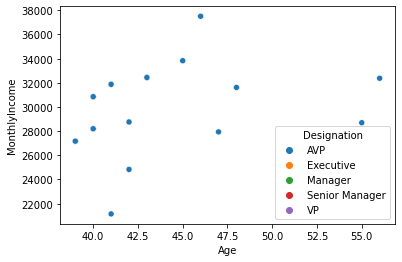

<IPython.core.display.Javascript object>

In [65]:
sns.scatterplot(data=data_SuperDeluxe, x="Age", y="MonthlyIncome", hue="Designation")

<AxesSubplot:xlabel='MaritalStatus', ylabel='MonthlyIncome'>

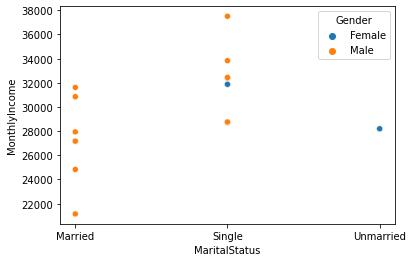

<IPython.core.display.Javascript object>

In [66]:
sns.scatterplot(
    data=data_SuperDeluxe, x="MaritalStatus", y="MonthlyIncome", hue="Gender"
)

### Observation on Super Deluxe Package Customer Profile

* Age Group: Avg 43
* Contacted by: Company
* Gender: Male
* City Tier: 3
* Occupation: Mostly Salaried
* Marital Status: Mostly Single
* Designation: All are AVP
* Monthly Income: Avg ~29K (almost = 30K)

### Customer Profile for "King" Package

In [67]:
data_King = data[(data["ProductPitched"] == "King") & (data["ProdTaken"] == 1)]

<IPython.core.display.Javascript object>

In [68]:
data_King.head()

ProdTaken   Age TypeofContact CityTier  DurationOfPitch      Occupation  \
45           1  41.0  Self Enquiry        1             18.0  Large Business   
568          1  55.0  Self Enquiry        1              8.0  Small Business   
595          1  58.0  Self Enquiry        1              8.0        Salaried   
749          1  52.0  Self Enquiry        3              8.0  Small Business   
913          1  45.0  Self Enquiry        3              8.0  Small Business   

     Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
45   Female                       2                3.0           King   
568    Male                       3                3.0           King   
595    Male                       2                3.0           King   
749  Female                       2                5.0           King   
913  Female                       3                5.0           King   

     PreferredPropertyStar MaritalStatus  NumberOfTrips Passport  \
45                     3.0      Divorced            2.0        0   
568                    5.0      Divorced            6.0        1   
595                    4.0        Single            1.0        1   
749                    3.0      Divorced            2.0        0   
913                    4.0        Single            3.0        1   

     PitchSatisfactionScore OwnCar  NumberOfChildrenVisiting Designation  \
45                        4      1                       0.0          VP   
568                       2      1                       NaN          VP   
595                       3      1                       1.0          VP   
749                       3      1                       NaN          VP   
913                       5      0                       2.0          VP   

     MonthlyIncome  
45         34545.0  
568        34859.0  
595        34246.0  
749        34845.0  
913        33824.0

<IPython.core.display.Javascript object>

In [69]:
data_King.describe(include="all").T

count unique             top  freq      mean  \
ProdTaken                 20.0    NaN             NaN   NaN       1.0   
Age                       20.0    NaN             NaN   NaN      48.9   
TypeofContact               20      1    Self Enquiry    20       NaN   
CityTier                  20.0    2.0             1.0  12.0       NaN   
DurationOfPitch           20.0    NaN             NaN   NaN      10.5   
Occupation                  20      3  Small Business    12       NaN   
Gender                      20      2          Female    12       NaN   
NumberOfPersonVisiting    20.0    NaN             NaN   NaN       2.9   
NumberOfFollowups         20.0    NaN             NaN   NaN       4.3   
ProductPitched              20      1            King    20       NaN   
PreferredPropertyStar     16.0    NaN             NaN   NaN      3.75   
MaritalStatus               20      3          Single     8       NaN   
NumberOfTrips             17.0    NaN             NaN   NaN  3.411765   
Passport                  20.0    2.0             1.0  12.0       NaN   
PitchSatisfactionScore    20.0    NaN             NaN   NaN       3.3   
OwnCar                    20.0    2.0             1.0  18.0       NaN   
NumberOfChildrenVisiting  16.0    NaN             NaN   NaN    1.4375   
Designation                 20      1              VP    20       NaN   
MonthlyIncome             20.0    NaN             NaN   NaN   34672.1   

                                  std      min       25%      50%      75%  \
ProdTaken                         0.0      1.0       1.0      1.0      1.0   
Age                          9.618513     27.0      42.0     52.5     56.0   
TypeofContact                     NaN      NaN       NaN      NaN      NaN   
CityTier                          NaN      NaN       NaN      NaN      NaN   
DurationOfPitch              4.135851      8.0       8.0      9.0      9.0   
Occupation                        NaN      NaN       NaN      NaN      NaN   
Gender                            NaN      NaN       NaN      NaN      NaN   
NumberOfPersonVisiting       0.718185      2.0       2.0      3.0      3.0   
NumberOfFollowups            1.128576      3.0       3.0      4.0      5.0   
ProductPitched                    NaN      NaN       NaN      NaN      NaN   
PreferredPropertyStar         0.68313      3.0       3.0      4.0      4.0   
MaritalStatus                     NaN      NaN       NaN      NaN      NaN   
NumberOfTrips                1.938389      1.0       2.0      3.0      4.0   
Passport                          NaN      NaN       NaN      NaN      NaN   
PitchSatisfactionScore       1.218282      1.0       3.0      3.0      4.0   
OwnCar                            NaN      NaN       NaN      NaN      NaN   
NumberOfChildrenVisiting     0.892095      0.0       1.0      1.0      2.0   
Designation                       NaN      NaN       NaN      NaN      NaN   
MonthlyIncome             5577.603833  17517.0  34470.25  34859.0  38223.0   

                              max  
ProdTaken                     1.0  
Age                          59.0  
TypeofContact                 NaN  
CityTier                      NaN  
DurationOfPitch              19.0  
Occupation                    NaN  
Gender                        NaN  
NumberOfPersonVisiting        4.0  
NumberOfFollowups             6.0  
ProductPitched                NaN  
PreferredPropertyStar         5.0  
MaritalStatus                 NaN  
NumberOfTrips                 7.0  
Passport                      NaN  
PitchSatisfactionScore        5.0  
OwnCar                        NaN  
NumberOfChildrenVisiting      3.0  
Designation                   NaN  
MonthlyIncome             38537.0

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

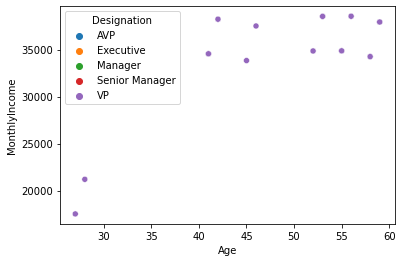

<IPython.core.display.Javascript object>

In [70]:
sns.scatterplot(data=data_King, x="Age", y="MonthlyIncome", hue="Designation")

<AxesSubplot:xlabel='MaritalStatus', ylabel='MonthlyIncome'>

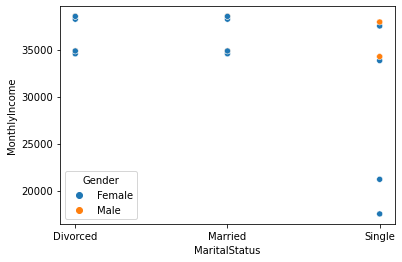

<IPython.core.display.Javascript object>

In [71]:
sns.scatterplot(data=data_King, x="MaritalStatus", y="MonthlyIncome", hue="Gender")

### Observation on King Package Customer Profile

* Age Group: Avg 50
* Contacted by: Self
* Gender: FeMale
* City Tier: 1
* Occupation: Mostly Small Business
* Marital Status: Mostly Single
* Designation: All are VP
* Monthly Income: Avg ~34K (almost = 30K)

## Correlation

In [72]:
data.corr()

ProdTaken       Age  DurationOfPitch  \
ProdTaken                  1.000000 -0.147254         0.078257   
Age                       -0.147254  1.000000        -0.012063   
DurationOfPitch            0.078257 -0.012063         1.000000   
NumberOfPersonVisiting     0.009627  0.011621         0.065141   
NumberOfFollowups          0.112171 -0.002577         0.009434   
PreferredPropertyStar      0.099577 -0.010474        -0.006637   
NumberOfTrips              0.018898  0.184905         0.009715   
PitchSatisfactionScore     0.051394  0.018510        -0.002880   
NumberOfChildrenVisiting   0.007421  0.007370         0.031408   
MonthlyIncome             -0.130585  0.464869        -0.006252   

                          NumberOfPersonVisiting  NumberOfFollowups  \
ProdTaken                               0.009627           0.112171   
Age                                     0.011621          -0.002577   
DurationOfPitch                         0.065141           0.009434   
NumberOfPersonVisiting                  1.000000           0.328569   
NumberOfFollowups                       0.328569           1.000000   
PreferredPropertyStar                   0.033867          -0.024176   
NumberOfTrips                           0.195223           0.139517   
PitchSatisfactionScore                 -0.019581           0.004054   
NumberOfChildrenVisiting                0.610621           0.286425   
MonthlyIncome                           0.195134           0.176503   

                          PreferredPropertyStar  NumberOfTrips  \
ProdTaken                              0.099577       0.018898   
Age                                   -0.010474       0.184905   
DurationOfPitch                       -0.006637       0.009715   
NumberOfPersonVisiting                 0.033867       0.195223   
NumberOfFollowups                     -0.024176       0.139517   
PreferredPropertyStar                  1.000000       0.012115   
NumberOfTrips                          0.012115       1.000000   
PitchSatisfactionScore                -0.022701      -0.004378   
NumberOfChildrenVisiting               0.035798       0.168795   
MonthlyIncome                          0.014289       0.139105   

                          PitchSatisfactionScore  NumberOfChildrenVisiting  \
ProdTaken                               0.051394                  0.007421   
Age                                     0.018510                  0.007370   
DurationOfPitch                        -0.002880                  0.031408   
NumberOfPersonVisiting                 -0.019581                  0.610621   
NumberOfFollowups                       0.004054                  0.286425   
PreferredPropertyStar                  -0.022701                  0.035798   
NumberOfTrips                          -0.004378                  0.168795   
PitchSatisfactionScore                  1.000000                  0.000878   
NumberOfChildrenVisiting                0.000878                  1.000000   
MonthlyIncome                           0.030421                  0.201643   

                          MonthlyIncome  
ProdTaken                     -0.130585  
Age                            0.464869  
DurationOfPitch               -0.006252  
NumberOfPersonVisiting         0.195134  
NumberOfFollowups              0.176503  
PreferredPropertyStar          0.014289  
NumberOfTrips                  0.139105  
PitchSatisfactionScore         0.030421  
NumberOfChildrenVisiting       0.201643  
MonthlyIncome                  1.000000

<IPython.core.display.Javascript object>

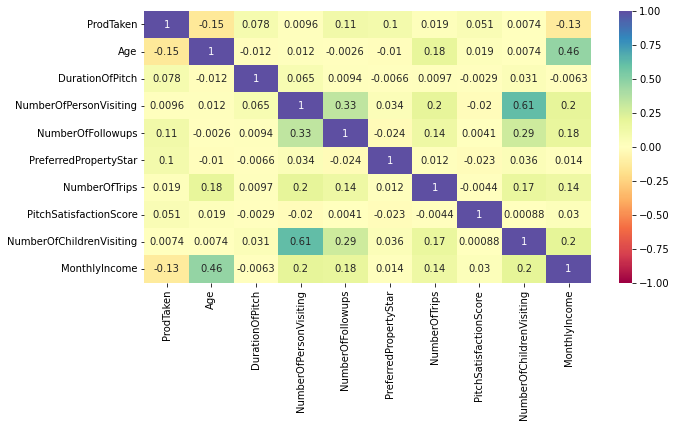

<IPython.core.display.Javascript object>

In [73]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True, cmap="Spectral", vmin=-1, vmax=1)
plt.show()

**Observations**

* Age and Monthly income are slightly positively correlated (0.46)
* Number of person visiting and followups are slightly positively correlated(0.33)
* Number of Children visiting and Number of person visiting are positively correlated(0.61)

## Data Preprocessing

### Missing value detection

In [74]:
data.isnull().sum().sort_values()

ProdTaken                     0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
MaritalStatus                 0
Designation                   0
NumberOfPersonVisiting        0
ProductPitched                0
Occupation                    0
CityTier                      0
Gender                        0
TypeofContact                25
PreferredPropertyStar        26
NumberOfFollowups            45
NumberOfChildrenVisiting     66
NumberOfTrips               140
Age                         226
MonthlyIncome               233
DurationOfPitch             251
dtype: int64

<IPython.core.display.Javascript object>

#### Missing value treatment of "TypeOfContact"

In [75]:
data["TypeofContact"].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

<IPython.core.display.Javascript object>

**Since this is a categorical column, the null can be replaced with the highest occurence item, which is "Self Enquiry"**

In [76]:
data["TypeofContact"].mode()

data["TypeofContact"] = data["TypeofContact"].fillna("Self Enquiry")

<IPython.core.display.Javascript object>

#### Missing value treatment of "PreferredPropertyStar"

In [77]:
data["PreferredPropertyStar"].describe()

count    4862.000000
mean        3.581037
std         0.798009
min         3.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: PreferredPropertyStar, dtype: float64

<IPython.core.display.Javascript object>

In [78]:
data.groupby(["Designation", "Gender"], as_index=False)["PreferredPropertyStar"].mean()

Designation  Gender  PreferredPropertyStar
0             AVP  Female               3.550000
1             AVP    Male               3.604396
2       Executive  Female               3.656848
3       Executive    Male               3.543890
4         Manager  Female               3.524862
5         Manager    Male               3.585899
6  Senior Manager  Female               3.695385
7  Senior Manager    Male               3.610577
8              VP  Female               3.611111
9              VP    Male               3.407407

<IPython.core.display.Javascript object>

**Since no outliers on this feature mean or median can be used to impute the missing values. But since the rating is the whole number in the input data, imputing the missing values with median**

In [79]:
data["PreferredPropertyStar"] = data.groupby(["Designation"])[
    "PreferredPropertyStar"
].apply(lambda x: x.fillna(x.median()))

data[data["PreferredPropertyStar"].isnull()]

Empty DataFrame
Columns: [ProdTaken, Age, TypeofContact, CityTier, DurationOfPitch, Occupation, Gender, NumberOfPersonVisiting, NumberOfFollowups, ProductPitched, PreferredPropertyStar, MaritalStatus, NumberOfTrips, Passport, PitchSatisfactionScore, OwnCar, NumberOfChildrenVisiting, Designation, MonthlyIncome]
Index: []

<IPython.core.display.Javascript object>

#### Missing value treatment of "NumberOfFollowups"

In [80]:
data["NumberOfFollowups"].describe()

count    4843.000000
mean        3.708445
std         1.002509
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: NumberOfFollowups, dtype: float64

<IPython.core.display.Javascript object>

In [81]:
data.value_counts(subset=["Gender", "ProductPitched", "NumberOfFollowups"])

Gender  ProductPitched  NumberOfFollowups
Male    Basic           4.0                  477
        Deluxe          4.0                  414
        Basic           3.0                  358
Female  Deluxe          4.0                  310
Male    Deluxe          3.0                  295
Female  Basic           4.0                  290
        Deluxe          3.0                  214
        Basic           3.0                  198
Male    Standard        4.0                  186
        Basic           5.0                  173
        Deluxe          5.0                  151
Female  Standard        4.0                  147
Male    Standard        3.0                  118
Female  Basic           5.0                  115
        Deluxe          5.0                  112
        Standard        3.0                  103
Male    Standard        5.0                   82
        Super Deluxe    4.0                   79
        King            4.0                   66
Female  Super Deluxe    4.0

<IPython.core.display.Javascript object>

In [82]:
data.groupby(["Gender", "ProductPitched"], as_index=False)["NumberOfFollowups"].mean()

Gender ProductPitched  NumberOfFollowups
0  Female          Basic           3.740741
1  Female         Deluxe           3.703652
2  Female           King           3.987805
3  Female       Standard           3.708589
4  Female   Super Deluxe           3.512500
5    Male          Basic           3.666378
6    Male         Deluxe           3.700405
7    Male           King           3.702703
8    Male       Standard           3.855769
9    Male   Super Deluxe           3.631868

<IPython.core.display.Javascript object>

**Since the number of followups will be the whole number, imputing the missing values with mean**

In [83]:
data["NumberOfFollowups"] = data.groupby(["Gender", "ProductPitched"])[
    "NumberOfFollowups"
].apply(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

In [84]:
data.isnull().sum().sort_values()

ProdTaken                     0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
MaritalStatus                 0
PreferredPropertyStar         0
Designation                   0
NumberOfFollowups             0
ProductPitched                0
Gender                        0
Occupation                    0
CityTier                      0
TypeofContact                 0
NumberOfPersonVisiting        0
NumberOfChildrenVisiting     66
NumberOfTrips               140
Age                         226
MonthlyIncome               233
DurationOfPitch             251
dtype: int64

<IPython.core.display.Javascript object>

#### Missing value treatment of "NumberOfChildrenVisiting"

In [85]:
data[data["NumberOfChildrenVisiting"].isnull()]

ProdTaken   Age    TypeofContact CityTier  DurationOfPitch  \
165           0  50.0     Self Enquiry        1             17.0   
190           0  52.0     Self Enquiry        1              6.0   
568           1  55.0     Self Enquiry        1              8.0   
746           0  41.0  Company Invited        1             13.0   
749           1  52.0     Self Enquiry        3              8.0   
851           0  56.0     Self Enquiry        1             10.0   
898           0  43.0     Self Enquiry        1              9.0   
918           0  51.0  Company Invited        3             15.0   
956           0  56.0     Self Enquiry        2             14.0   
1009          0  58.0     Self Enquiry        1              6.0   
1154          0  47.0     Self Enquiry        2             32.0   
1242          0  40.0     Self Enquiry        3             13.0   
1331          0  48.0     Self Enquiry        1             16.0   
1401          0  55.0     Self Enquiry        2             32.0   
1635          0  50.0     Self Enquiry        1             17.0   
1660          0  52.0     Self Enquiry        1              6.0   
2038          1  55.0     Self Enquiry        1              8.0   
2216          0  41.0  Company Invited        1             13.0   
2219          1  52.0     Self Enquiry        3              8.0   
2321          0  56.0     Self Enquiry        1             10.0   
2368          0  43.0     Self Enquiry        1              9.0   
2388          1  51.0  Company Invited        1             34.0   
2426          1  56.0     Self Enquiry        3             22.0   
2638          0  46.0  Company Invited        1              9.0   
2679          0  44.0     Self Enquiry        3             23.0   
2707          0  47.0     Self Enquiry        3              9.0   
2744          0  42.0     Self Enquiry        3              9.0   
2792          0  43.0     Self Enquiry        1             30.0   
2823          0  56.0     Self Enquiry        1              9.0   
2852          0  53.0     Self Enquiry        1             11.0   
2889          0  56.0     Self Enquiry        3             25.0   
2899          0  34.0     Self Enquiry        1              7.0   
2910          0  42.0     Self Enquiry        3              9.0   
2933          0  44.0     Self Enquiry        1             13.0   
3005          0  53.0     Self Enquiry        3             10.0   
3036          0  48.0     Self Enquiry        1              9.0   
3060          0  52.0     Self Enquiry        3             33.0   
3218          0  56.0  Company Invited        1              9.0   
3349          0  30.0     Self Enquiry        1              7.0   
3389          0  51.0     Self Enquiry        1             35.0   
3443          0  43.0     Self Enquiry        2             17.0   
3458          0  32.0     Self Enquiry        1             15.0   
3487          0  54.0     Self Enquiry        1              9.0   
3520          0  55.0  Company Invited        1             18.0   
3522          0  45.0     Self Enquiry        1             35.0   
3524          0  47.0     Self Enquiry        3             10.0   
3540          0  41.0     Self Enquiry        2             13.0   
3620          0  50.0     Self Enquiry        1             29.0   
3638          0  48.0     Self Enquiry        3              9.0   
3669          0  46.0     Self Enquiry        1             35.0   
3792          0  41.0     Self Enquiry        1              7.0   
4108          0  46.0  Company Invited        1              9.0   
4149          0  44.0     Self Enquiry        3             23.0   
4214          0  42.0     Self Enquiry        3              9.0   
4262          0  43.0     Self Enquiry        1             30.0   
4293          0  56.0     Self Enquiry        1              9.0   
4322          0  53.0     Self Enquiry        1             11.0   
4359          0  56.0     Self Enquiry        3             25

<IPython.core.display.Javascript object>

In [86]:
data.value_counts(subset=["MaritalStatus", "NumberOfChildrenVisiting"])

MaritalStatus  NumberOfChildrenVisiting
Married        1.0                         987
               2.0                         663
               0.0                         498
Divorced       1.0                         400
Single         1.0                         383
Unmarried      1.0                         310
Single         0.0                         276
Divorced       2.0                         241
Unmarried      2.0                         231
Divorced       0.0                         226
Single         2.0                         200
Married        3.0                         163
Unmarried      0.0                          82
Divorced       3.0                          66
Unmarried      3.0                          59
Single         3.0                          37
dtype: int64

<IPython.core.display.Javascript object>

#### Assuming children visited is missing because no children accompanied these customers so we will fill the missing values with 0

In [87]:
# Impute missing NumberOfChildrenVisited with 0
data["NumberOfChildrenVisiting"] = data["NumberOfChildrenVisiting"].fillna(0)

<IPython.core.display.Javascript object>

#### Missing value treatment of "NumberOfTrips"

In [88]:
data.groupby(["MaritalStatus", "NumberOfChildrenVisiting"])["NumberOfTrips"].median()

MaritalStatus  NumberOfChildrenVisiting
Divorced       0.0                         2.0
               1.0                         3.0
               2.0                         3.0
               3.0                         3.0
Married        0.0                         2.0
               1.0                         3.0
               2.0                         3.0
               3.0                         3.0
Single         0.0                         2.0
               1.0                         2.0
               2.0                         3.0
               3.0                         3.0
Unmarried      0.0                         2.0
               1.0                         3.0
               2.0                         3.0
               3.0                         3.0
Name: NumberOfTrips, dtype: float64

<IPython.core.display.Javascript object>

In [89]:
data["NumberOfTrips"] = data.groupby(["MaritalStatus", "NumberOfChildrenVisiting"])[
    "NumberOfTrips"
].apply(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

#### Missing value treatment for Age

In [90]:
data.groupby(["Gender", "MaritalStatus", "Designation"])["Age"].median()

Gender  MaritalStatus  Designation   
Female  Divorced       AVP               47.0
                       Executive         34.0
                       Manager           36.0
                       Senior Manager    40.5
                       VP                51.5
        Married        AVP               48.0
                       Executive         33.0
                       Manager           38.0
                       Senior Manager    38.0
                       VP                51.0
        Single         AVP               53.0
                       Executive         30.0
                       Manager           35.5
                       Senior Manager    40.5
                       VP                47.0
        Unmarried      AVP               40.0
                       Executive         33.0
                       Manager           36.0
                       Senior Manager    36.5
                       VP                 NaN
Male    Divorced       AVP               4

<IPython.core.display.Javascript object>

In [91]:
data["Age"] = data.groupby(["Gender", "MaritalStatus", "Designation"])["Age"].apply(
    lambda x: x.fillna(x.median())
)

<IPython.core.display.Javascript object>

In [92]:
data.isnull().sum()

ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

#### Missing value treatment of "DurationOfPitch"

In [93]:
data.groupby(["ProductPitched", "NumberOfFollowups"])["DurationOfPitch"].median()

ProductPitched  NumberOfFollowups
Basic           1.0                  14.0
                2.0                  15.0
                3.0                  13.0
                4.0                  13.0
                5.0                  12.0
                6.0                  15.5
Deluxe          1.0                  11.5
                2.0                  13.0
                3.0                  14.0
                4.0                  14.0
                5.0                  13.0
                6.0                  13.0
King            1.0                  15.0
                2.0                  15.5
                3.0                  10.0
                4.0                  11.0
                5.0                  10.0
                6.0                   9.0
Standard        1.0                  14.0
                2.0                  15.0
                3.0                  14.0
                4.0                  14.0
                5.0                  14.0


<IPython.core.display.Javascript object>

In [94]:
data["DurationOfPitch"] = data.groupby(["ProductPitched", "NumberOfFollowups"])[
    "DurationOfPitch"
].apply(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

In [95]:
data.groupby(["CityTier", "Gender", "Occupation", "Designation"])[
    "MonthlyIncome"
].median()

CityTier  Gender  Occupation      Designation   
1         Female  Free Lancer     AVP                   NaN
                                  Executive             NaN
                                  Manager               NaN
                                  Senior Manager        NaN
                                  VP                    NaN
                  Large Business  AVP               31762.0
                                  Executive         20748.0
                                  Manager           21687.0
                                  Senior Manager    28332.5
                                  VP                36583.0
                  Salaried        AVP               31752.0
                                  Executive         20744.0
                                  Manager           22690.5
                                  Senior Manager    26795.5
                                  VP                35911.5
                  Small Business  AVP              

<IPython.core.display.Javascript object>

In [96]:
data["MonthlyIncome"] = data.groupby(
    ["CityTier", "Gender", "Occupation", "Designation"]
)["MonthlyIncome"].apply(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

In [97]:
data.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

<IPython.core.display.Javascript object>

#### All the missing values are treated and now the features are having values in all the rows. 

### Outliers detection

**Let's find the percentage of outliers, in each column of the data, using IQR.**

**Treating outliers**

We will cap/clip the minimum and maximum value of these columns to the lower and upper whisker value of the boxplot found using  **Q1 - 1.5*IQR** and **Q3 + 1.5*IQR**, respectively.

**Note**: Generally, a value of 1.5 * IQR is taken to cap the values of outliers to upper and lower whiskers but any number (example 0.5, 2, 3, etc) other than 1.5 can be chosen. The value depends upon the business problem statement.

In [98]:
# Finding the 25th percentile and 75th percentile for the numerical columns.
Q1 = data[num_col].quantile(0.25)
Q3 = data[num_col].quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5 * IQR

<IPython.core.display.Javascript object>

In [99]:
# Percentage of outliers in each column
((data[num_col] < lower_whisker) | (data[num_col] > upper_whisker)).sum() / data.shape[
    0
] * 100

Age                         0.000000
DurationOfPitch             2.291326
NumberOfPersonVisiting      0.061375
NumberOfFollowups           6.382979
PreferredPropertyStar       0.000000
NumberOfTrips               2.229951
PitchSatisfactionScore      0.000000
NumberOfChildrenVisiting    0.000000
MonthlyIncome               7.528642
dtype: float64

<IPython.core.display.Javascript object>

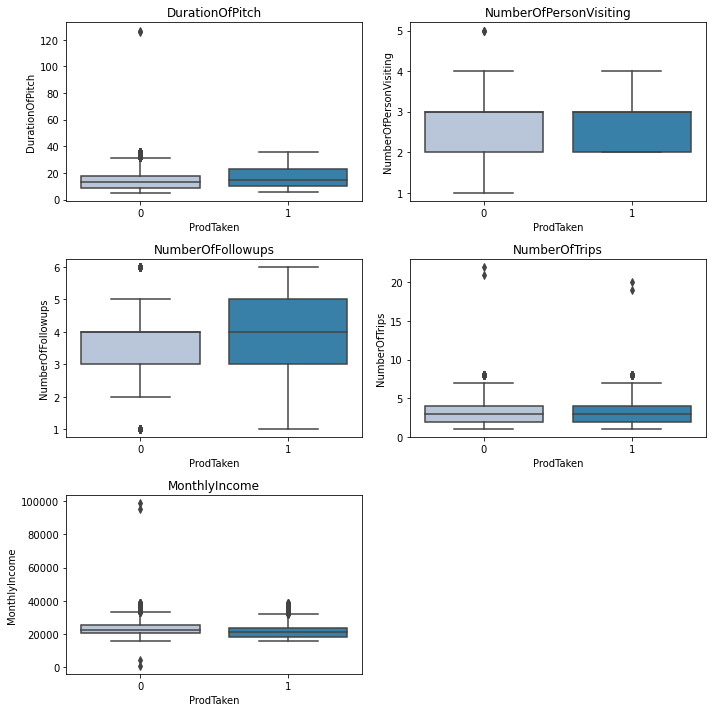

<IPython.core.display.Javascript object>

In [100]:
cols = data[
    [
        "DurationOfPitch",
        "NumberOfPersonVisiting",
        "NumberOfFollowups",
        "NumberOfTrips",
        "MonthlyIncome",
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["ProdTaken"], data[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [101]:
Q1 = data["DurationOfPitch"].quantile(0.25)  # 25th quantile
Q3 = data["DurationOfPitch"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
print(lower_whisker)
print(upper_whisker)

-6.0
34.0


<IPython.core.display.Javascript object>

In [102]:
data.loc[data["DurationOfPitch"] > 34.0].sort_values("DurationOfPitch", ascending=False)

ProdTaken   Age    TypeofContact CityTier  DurationOfPitch  \
3878          0  53.0  Company Invited        3            127.0   
1434          0  32.0  Company Invited        3            126.0   
3236          1  34.0  Company Invited        1             36.0   
2869          0  51.0     Self Enquiry        1             36.0   
2585          0  46.0     Self Enquiry        1             36.0   
2643          0  39.0     Self Enquiry        1             36.0   
2648          1  39.0     Self Enquiry        1             36.0   
2703          1  32.0  Company Invited        1             36.0   
2715          1  48.0  Company Invited        1             36.0   
2796          0  49.0     Self Enquiry        3             36.0   
2853          0  43.0  Company Invited        1             36.0   
3870          0  33.0     Self Enquiry        1             36.0   
2868          0  58.0     Self Enquiry        3             36.0   
3768          0  30.0     Self Enquiry        1             36.0   
3975          0  39.0  Company Invited        1             36.0   
3718          0  32.0     Self Enquiry        3             36.0   
2904          0  27.0     Self Enquiry        3             36.0   
3674          0  25.0     Self Enquiry        1             36.0   
3048          0  43.0     Self Enquiry        1             36.0   
3192          1  27.0  Company Invited        3             36.0   
3200          0  33.0  Company Invited        1             36.0   
3553          0  31.0     Self Enquiry        3             36.0   
3268          0  43.0     Self Enquiry        1             36.0   
3309          0  31.0     Self Enquiry        3             36.0   
3319          0  45.0     Self Enquiry        1             36.0   
3423          0  35.0     Self Enquiry        1             36.0   
3517          0  29.0     Self Enquiry        1             36.0   
2505          0  39.0  Company Invited        1             36.0   
4374          0  27.0     Self Enquiry        3             36.0   
4266          0  49.0     Self Enquiry        3             36.0   
4789          0  45.0     Self Enquiry        1             36.0   
4779          0  31.0     Self Enquiry        3             36.0   
4738          0  43.0     Self Enquiry        1             36.0   
4706          1  34.0  Company Invited        1             36.0   
4670          0  33.0  Company Invited        1             36.0   
4662          1  27.0  Company Invited        3             36.0   
4518          0  43.0     Self Enquiry        1             36.0   
4339          0  51.0     Self Enquiry        1             36.0   
4338          0  58.0     Self Enquiry        3             36.0   
4323          0  43.0  Company Invited        1             36.0   
3481          0  46.0     Self Enquiry        1             36.0   
4185          1  48.0  Company Invited        1             36.0   
4173          1  32.0  Company Invited        1             36.0   
4055          0  46.0     Self Enquiry        1             36.0   
4118          1  39.0     Self Enquiry        1             36.0   
4113          0  39.0     Self Enquiry        1             36.0   
4238          0  31.0     Self Enquiry        1             35.0   
3890          0  35.0     Self Enquiry        3             35.0   
3522          0  45.0     Self Enquiry        1             35.0   
3536          0  46.0     Self Enquiry        1             35.0   
3539          0  34.0     Self Enquiry        1             35.0   
3905          1  51.0     Self Enquiry        3             35.0   
3904          0  30.0     Self Enquiry        1             35.0   
4722          0  30.0     Self Enquiry        1             35.0   
3544          0  36.0     Self Enquiry        3             35.0   
4664          0  45.0     Self Enquiry        3             35.0   
3574          0  36.0     Self Enquiry        1             35.0   
4327          0  43.0  Company Invited        1             35

<IPython.core.display.Javascript object>

In [103]:
# Dropping observaions with duration of pitch greater than 36. There are just 2 such observations
data.drop(index=data[data.DurationOfPitch > 36].index, inplace=True)

<IPython.core.display.Javascript object>

In [104]:
Q1 = data["NumberOfTrips"].quantile(0.25)  # 25th quantile
Q3 = data["NumberOfTrips"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
print(lower_whisker)
print(upper_whisker)

-1.0
7.0


<IPython.core.display.Javascript object>

In [105]:
data.loc[data["NumberOfTrips"] > 7.0].sort_values("NumberOfTrips", ascending=False)

ProdTaken   Age    TypeofContact CityTier  DurationOfPitch  \
3260          0  40.0  Company Invited        1             16.0   
816           0  39.0  Company Invited        1             15.0   
2829          1  31.0  Company Invited        1             11.0   
385           1  30.0  Company Invited        1             10.0   
4028          0  35.0     Self Enquiry        1             13.0   
4260          0  42.0     Self Enquiry        1             13.0   
4227          0  34.0  Company Invited        1             12.0   
4164          1  38.0  Company Invited        1             17.0   
4161          0  35.0     Self Enquiry        1              9.0   
4135          0  34.0     Self Enquiry        1             11.0   
4132          0  46.0  Company Invited        3             13.0   
4075          0  28.0  Company Invited        1             16.0   
4073          0  35.0  Company Invited        3              9.0   
4049          0  37.0     Self Enquiry        1             13.0   
3923          0  37.0     Self Enquiry        1             34.0   
4281          0  51.0     Self Enquiry        1             17.0   
3916          1  38.0     Self Enquiry        1              9.0   
3879          0  45.0     Self Enquiry        1              7.0   
3863          0  43.0     Self Enquiry        1             25.0   
3857          0  26.0     Self Enquiry        1              9.0   
3850          0  55.0     Self Enquiry        1             17.0   
3840          1  54.0     Self Enquiry        3             31.0   
3810          0  40.0  Company Invited        3             28.0   
3726          0  34.0     Self Enquiry        1             15.0   
3690          1  31.0  Company Invited        2             15.0   
3681          1  33.0     Self Enquiry        3              7.0   
3675          0  47.0     Self Enquiry        1             20.0   
4278          0  38.0     Self Enquiry        1             17.0   
4305          0  41.0     Self Enquiry        1              9.0   
3670          0  33.0  Company Invited        1             17.0   
4618          0  36.0     Self Enquiry        3             10.0   
4857          1  47.0     Self Enquiry        3             22.0   
4847          1  29.0     Self Enquiry        1              8.0   
4840          1  44.0  Company Invited        1              9.0   
4778          1  42.0  Company Invited        1             12.0   
4754          0  36.0     Self Enquiry        1              7.0   
4735          0  50.0     Self Enquiry        3             15.0   
4685          0  55.0     Self Enquiry        3              9.0   
4676          1  27.0  Company Invited        1              9.0   
4651          0  42.0     Self Enquiry        1             14.0   
4637          0  47.0     Self Enquiry        1             14.0   
4625          1  30.0     Self Enquiry        1             17.0   
4615          0  54.0     Self Enquiry        3              9.0   
4386          0  38.0     Self Enquiry        1              7.0   
4596          0  33.0  Company Invited        1              7.0   
4571          0  30.0     Self Enquiry        1             14.0   
4563          0  54.0     Self Enquiry        1             30.0   
4559          1  30.0     Self Enquiry        3              7.0   
4544          0  23.0     Self Enquiry        1              7.0   
4515          0  41.0  Company Invited        1             23.0   
4512          1  29.0     Self Enquiry        1              9.0   
4492          0  39.0  Company Invited        1              9.0   
4487          1  27.0     Self Enquiry        3             15.0   
4473          0  39.0     Self Enquiry        1              9.0   
4461          1  43.0  Company Invited        1             26.0   
3672          0  42.0  Company Invited        2             11.0   
3638          0  48.0     Self Enquiry        3              9.0   
3643          0  37.0     Self Enquiry        1             33

<IPython.core.display.Javascript object>

In [106]:
# Dropping observations with number of trips greater than 8. There are just 4 such observations
data.drop(index=data[data.NumberOfTrips > 8].index, inplace=True)

<IPython.core.display.Javascript object>

In [107]:
Q1 = data["MonthlyIncome"].quantile(0.25)  # 25th quantile
Q3 = data["MonthlyIncome"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
print(lower_whisker)
print(upper_whisker)

12957.125
32914.125


<IPython.core.display.Javascript object>

In [108]:
data.loc[data["MonthlyIncome"] > 33408.5].sort_values("MonthlyIncome", ascending=False)
# data.sort_values(by=["MonthlyIncome"], ascending=False).head(5)

ProdTaken   Age    TypeofContact CityTier  DurationOfPitch  \
2482          0  37.0     Self Enquiry        1             12.0   
38            0  36.0     Self Enquiry        1             11.0   
4104          0  53.0     Self Enquiry        1              7.0   
2634          0  53.0     Self Enquiry        1              7.0   
3190          0  42.0  Company Invited        1             14.0   
...         ...   ...              ...      ...              ...   
2509          0  56.0     Self Enquiry        1             15.0   
3979          0  56.0     Self Enquiry        1             15.0   
584           0  42.0  Company Invited        1             14.0   
2054          0  42.0  Company Invited        1             14.0   
3454          0  56.0     Self Enquiry        1              7.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
2482        Salaried  Female                       3                5.0   
38          Salaried  Female                       2                4.0   
4104        Salaried    Male                       4                5.0   
2634        Salaried    Male                       4                5.0   
3190        Salaried  Female                       3                6.0   
...              ...     ...                     ...                ...   
2509  Small Business  Female                       3                4.0   
3979  Small Business  Female                       3                4.0   
584         Salaried    Male                       3                3.0   
2054        Salaried    Male                       3                3.0   
3454  Small Business    Male                       3                2.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
2482          Basic                    5.0      Divorced            2.0   
38            Basic                    3.0      Divorced            1.0   
4104           King                    3.0       Married            2.0   
2634           King                    3.0      Divorced            2.0   
3190           King                    3.0       Married            3.0   
...             ...                    ...           ...            ...   
2509   Super Deluxe                    3.0       Married            4.0   
3979   Super Deluxe                    3.0       Married            4.0   
584            King                    3.0       Married            2.0   
2054           King                    3.0       Married            2.0   
3454   Super Deluxe                    3.0       Married            4.0   

     Passport  PitchSatisfactionScore OwnCar  NumberOfChildrenVisiting  \
2482        1                       2      1                       1.0   
38          1                       2      1                       0.0   
4104        0                       1      1                       3.0   
2634        0                       2      1                       2.0   
3190        0                       4      1                       1.0   
...       ...                     ...    ...                       ...   
2509        1                       3      0                       2.0   
3979        1                       3      1                       2.0   
584         0                       5      0                       1.0   
2054        0                       5      1                       1.0   
3454        0                       5      1                       1.0   

     Designation  MonthlyIncome  
2482   Executive        98678.0  
38     Executive        95000.0  
4104          VP        38677.0  
2634          VP        38677.0  
3190          VP        38651.0  
...          ...            ...  
2509         AVP        33434.0  
3979         AVP        33434.0  
584           VP        33430.0  
2054          VP        33430.0  
3454         AVP        33410.0  

[343 rows x 19 columns]

<IPython.core.display.Javascript object>

In [109]:
data.loc[data["MonthlyIncome"] < 12000].sort_values("MonthlyIncome", ascending=False)
# data.sort_values(by=["MonthlyIncome"], ascending=False).head(5)

ProdTaken   Age TypeofContact CityTier  DurationOfPitch      Occupation  \
2586          0  39.0  Self Enquiry        1             10.0  Large Business   
142           0  38.0  Self Enquiry        1              9.0  Large Business   

      Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
2586  Female                       3                4.0         Deluxe   
142   Female                       2                3.0         Deluxe   

      PreferredPropertyStar MaritalStatus  NumberOfTrips Passport  \
2586                    3.0        Single            5.0        1   
142                     3.0        Single            4.0        1   

      PitchSatisfactionScore OwnCar  NumberOfChildrenVisiting Designation  \
2586                       5      0                       1.0     Manager   
142                        5      0                       0.0     Manager   

      MonthlyIncome  
2586         4678.0  
142          1000.0

<IPython.core.display.Javascript object>

In [110]:
# Dropping observation with monthly income less than 12000 or greater than 40000. There are just 4 such observations
data.drop(
    index=data[(data.MonthlyIncome > 38700) | (data.MonthlyIncome < 12000)].index,
    inplace=True,
)

<IPython.core.display.Javascript object>

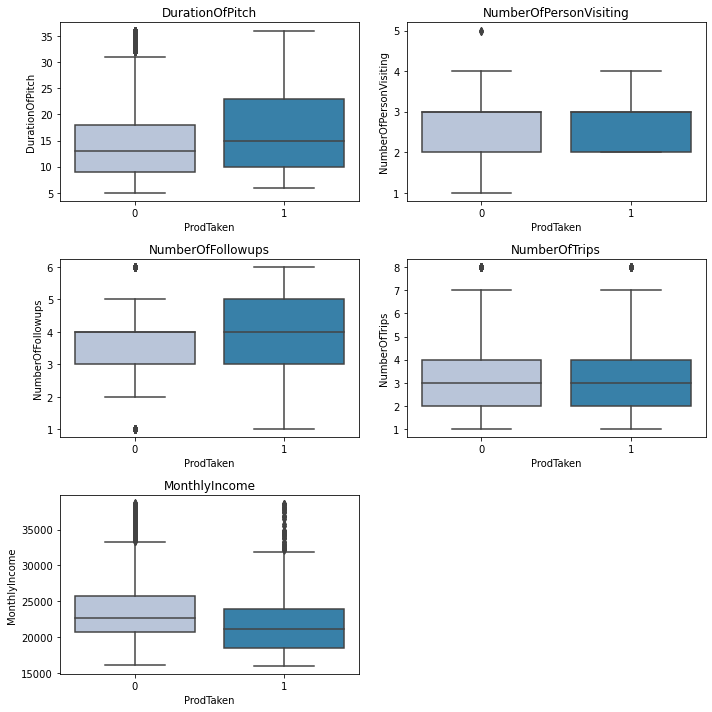

<IPython.core.display.Javascript object>

In [111]:
cols = data[
    [
        "DurationOfPitch",
        "NumberOfPersonVisiting",
        "NumberOfFollowups",
        "NumberOfTrips",
        "MonthlyIncome",
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["ProdTaken"], data[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Some extreme values in columns like DurationOfPitch, NumberOfTrips and MonthlyIncome are treated to remove those values. But while we are checking the records after that, its looking almost continuous. As some customers are having some extreme values, we can't simply remove as the model won't predict it properly. So, those outliers are not required to be treated in this case**

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4878 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4878 non-null   int64   
 1   Age                       4878 non-null   float64 
 2   TypeofContact             4878 non-null   category
 3   CityTier                  4878 non-null   category
 4   DurationOfPitch           4878 non-null   float64 
 5   Occupation                4878 non-null   category
 6   Gender                    4878 non-null   category
 7   NumberOfPersonVisiting    4878 non-null   int64   
 8   NumberOfFollowups         4878 non-null   float64 
 9   ProductPitched            4878 non-null   category
 10  PreferredPropertyStar     4878 non-null   float64 
 11  MaritalStatus             4878 non-null   category
 12  NumberOfTrips             4878 non-null   float64 
 13  Passport                  4878 non-null   catego

<IPython.core.display.Javascript object>

In [113]:
data.describe().T

count          mean          std      min  \
ProdTaken                 4878.0      0.188192     0.390905      0.0   
Age                       4878.0     37.413387     9.167910     18.0   
DurationOfPitch           4878.0     15.356191     8.005968      5.0   
NumberOfPersonVisiting    4878.0      2.905494     0.724994      1.0   
NumberOfFollowups         4878.0      3.711152     0.998873      1.0   
PreferredPropertyStar     4878.0      3.578311     0.797215      3.0   
NumberOfTrips             4878.0      3.213407     1.756259      1.0   
PitchSatisfactionScore    4878.0      3.078721     1.365512      1.0   
NumberOfChildrenVisiting  4878.0      1.171792     0.863214      0.0   
MonthlyIncome             4878.0  23526.624026  5040.120205  16009.0   

                               25%      50%       75%      max  
ProdTaken                     0.00      0.0      0.00      1.0  
Age                          31.00     36.0     43.00     61.0  
DurationOfPitch               9.00     14.0     19.00     36.0  
NumberOfPersonVisiting        2.00      3.0      3.00      5.0  
NumberOfFollowups             3.00      4.0      4.00      6.0  
PreferredPropertyStar         3.00      3.0      4.00      5.0  
NumberOfTrips                 2.00      3.0      4.00      8.0  
PitchSatisfactionScore        2.00      3.0      4.00      5.0  
NumberOfChildrenVisiting      1.00      1.0      2.00      3.0  
MonthlyIncome             20444.25  22404.5  25419.75  38677.0

<IPython.core.display.Javascript object>

In [114]:
data.sample(10)

ProdTaken   Age    TypeofContact CityTier  DurationOfPitch  \
2605          0  28.0  Company Invited        1             16.0   
3744          0  35.0     Self Enquiry        3             15.0   
2564          0  31.0  Company Invited        1             30.0   
1463          0  31.0  Company Invited        1             11.0   
2863          0  31.0  Company Invited        1             10.0   
4480          1  48.0  Company Invited        3             34.0   
2208          0  39.0     Self Enquiry        1              6.0   
1879          0  42.0  Company Invited        1             14.0   
1743          0  37.0     Self Enquiry        3             12.0   
59            0  37.0     Self Enquiry        1              6.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
2605  Small Business    Male                       3                4.0   
3744  Large Business    Male                       4                2.0   
2564        Salaried    Male                       4                6.0   
1463  Small Business    Male                       3                3.0   
2863        Salaried    Male                       3                4.0   
4480        Salaried  Female                       4                2.0   
2208        Salaried  Female                       3                4.0   
1879        Salaried  Female                       3                3.0   
1743  Small Business    Male                       3                3.0   
59          Salaried    Male                       2                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
2605          Basic                    4.0       Married            8.0   
3744         Deluxe                    3.0       Married            3.0   
2564          Basic                    3.0       Married            3.0   
1463         Deluxe                    5.0     Unmarried            1.0   
2863          Basic                    3.0      Divorced            6.0   
4480         Deluxe                    3.0     Unmarried            6.0   
2208   Super Deluxe                    3.0       Married            2.0   
1879         Deluxe                    3.0       Married            3.0   
1743         Deluxe                    3.0       Married            5.0   
59           Deluxe                    3.0       Married            2.0   

     Passport  PitchSatisfactionScore OwnCar  NumberOfChildrenVisiting  \
2605        0                       3      0                       1.0   
3744        0                       1      0                       3.0   
2564        0                       3      1                       3.0   
1463        0                       1      0                       2.0   
2863        0                       3      0                       2.0   
4480        1                       4      0                       2.0   
2208        0                       3      1                       0.0   
1879        0                       3      1                       1.0   
1743        0                       3      1                       0.0   
59          0                       5      1                       1.0   

     Designation  MonthlyIncome  
2605   Executive        20702.0  
3744     Manager        25477.0  
2564   Executive        21291.0  
1463     Manager        24936.0  
2863   Executive        20775.0  
4480     Manager        25075.0  
2208         AVP        27742.0  
1879     Manager        19556.0  
1743     Manager        21502.0  
59       Manager        20993.0

<IPython.core.display.Javascript object>

## Model Building <a class="anchor" id="model-build"></a>

### Preparing for Maching Learning Model

In [115]:
# Copying the data set into new dataframe for the model
df = data.copy()

# Dropping unnecessary columns from the df dataframe, which are not useful for modeling

df.drop(
    columns=[
        "PitchSatisfactionScore",
        "ProductPitched",
        "NumberOfFollowups",
        "DurationOfPitch",
    ],
    inplace=True,
)

df.head()

ProdTaken   Age    TypeofContact CityTier      Occupation  Gender  \
0          1  41.0     Self Enquiry        3        Salaried  Female   
1          0  49.0  Company Invited        1        Salaried    Male   
2          1  37.0     Self Enquiry        1     Free Lancer    Male   
3          0  33.0  Company Invited        1        Salaried  Female   
4          0  32.0     Self Enquiry        1  Small Business    Male   

   NumberOfPersonVisiting  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0                       3                    3.0        Single            1.0   
1                       3                    4.0      Divorced            2.0   
2                       3                    3.0        Single            7.0   
3                       2                    3.0      Divorced            2.0   
4                       2                    4.0      Divorced            1.0   

  Passport OwnCar  NumberOfChildrenVisiting Designation  MonthlyIncome  
0        1      1                       0.0     Manager        20993.0  
1        0      1                       2.0     Manager        20130.0  
2        1      0                       0.0   Executive        17090.0  
3        1      1                       1.0   Executive        17909.0  
4        0      1                       0.0   Executive        18468.0

<IPython.core.display.Javascript object>

In [116]:
# creating dummy varibles
dummy_data = pd.get_dummies(df, drop_first=True)
dummy_data.head()

ProdTaken   Age  NumberOfPersonVisiting  PreferredPropertyStar  \
0          1  41.0                       3                    3.0   
1          0  49.0                       3                    4.0   
2          1  37.0                       3                    3.0   
3          0  33.0                       2                    3.0   
4          0  32.0                       2                    4.0   

   NumberOfTrips  NumberOfChildrenVisiting  MonthlyIncome  \
0            1.0                       0.0        20993.0   
1            2.0                       2.0        20130.0   
2            7.0                       0.0        17090.0   
3            2.0                       1.0        17909.0   
4            1.0                       0.0        18468.0   

   TypeofContact_Self Enquiry  CityTier_2  CityTier_3  \
0                           1           0           1   
1                           0           0           0   
2                           1           0           0   
3                           0           0           0   
4                           1           0           0   

   Occupation_Large Business  Occupation_Salaried  Occupation_Small Business  \
0                          0                    1                          0   
1                          0                    1                          0   
2                          0                    0                          0   
3                          0                    1                          0   
4                          0                    0                          1   

   Gender_Male  MaritalStatus_Married  MaritalStatus_Single  \
0            0                      0                     1   
1            1                      0                     0   
2            1                      0                     1   
3            0                      0                     0   
4            1                      0                     0   

   MaritalStatus_Unmarried  Passport_1  OwnCar_1  Designation_Executive  \
0                        0           1         1                      0   
1                        0           0         1                      0   
2                        0           1         0                      1   
3                        0           1         1                      1   
4                        0           0         1                      1   

   Designation_Manager  Designation_Senior Manager  Designation_VP  
0                    1                           0               0  
1                    1                           0               0  
2                    0                           0               0  
3                    0                           0               0  
4                    0                           0               0

<IPython.core.display.Javascript object>

## Split Data

In [117]:
X = dummy_data.drop("ProdTaken", axis=1)  # Features
y = dummy_data["ProdTaken"]  # Labels (Target Variable)

<IPython.core.display.Javascript object>

In [118]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)
print(X_train.shape, X_test.shape)

(3414, 22) (1464, 22)


<IPython.core.display.Javascript object>

In [119]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.8099
1    0.1901
Name: ProdTaken, dtype: float64
Percentage of classes in test set:
0    0.816257
1    0.183743
Name: ProdTaken, dtype: float64


<IPython.core.display.Javascript object>

**Since the train & test set has 0 and 1(target variable) around 8:2 ratio like the original data, Stratify=Y is not needed**

In [120]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3414
Number of rows in test data = 1464


<IPython.core.display.Javascript object>

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a person will purchase the new travel package but in actual doesn't - Loss of Resource
2. Predicting a person will not purchase the new travel package but in actual does - Loss of Opportunity

### Which case is more important? 

* The purpose of the new package is to bring in more customers who accepts the Wellness tourism. But incase of "Loss of Opportunity" the company missed the potential customer. Comparitively the loss is much greater than the first case which is "Loss of Resource". So minimizing this loss is the important goal of this modelling.


### How to reduce this loss i.e need to reduce False Negatives?

* Recall is the right metric to check the performance of the model as the Company wants more number of customers who can take the travel package. Greater the recall lesser the chances of false negatives.


#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

In [123]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [124]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Bagging - Model Building <a class="anchor" id="bag"></a>

### Build Decision Tree Model 

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 19% and the frequency of class B is 81%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.19,1:0.81} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [125]:
dtree = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.19, 1: 0.81}, random_state=1
)

<IPython.core.display.Javascript object>

In [126]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

<IPython.core.display.Javascript object>

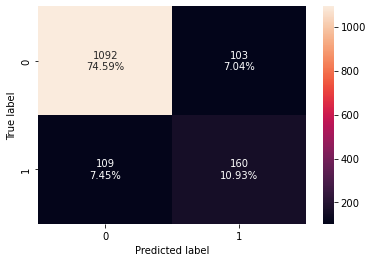

<IPython.core.display.Javascript object>

In [127]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [128]:
dtree_model_train_perf = model_performance_classification_sklearn(
    dtree, X_train, y_train
)
print("Training performance \n", dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


<IPython.core.display.Javascript object>

In [129]:
dtree_model_test_perf = model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n", dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.855191  0.594796   0.608365  0.601504


<IPython.core.display.Javascript object>

* Decision tree is working well on the training data but is not able to generalize well on the test data concerning the recall.

### Bagging Classifier

In [130]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

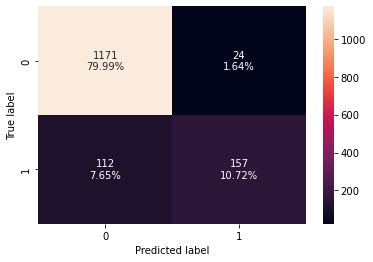

<IPython.core.display.Javascript object>

In [131]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [132]:
bagging_model_train_perf = model_performance_classification_sklearn(
    bagging, X_train, y_train
)
print("Training performance \n", bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.993263  0.969183   0.995253  0.982045


<IPython.core.display.Javascript object>

In [133]:
bagging_model_test_perf = model_performance_classification_sklearn(
    bagging, X_test, y_test
)
print("Testing performance \n", bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.907104  0.583643   0.867403  0.697778


<IPython.core.display.Javascript object>

* Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of recall.

**Bagging Classifier with weighted decision tree**

In [134]:
bagging_wt = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(
        criterion="gini", class_weight={0: 0.19, 1: 0.81}, random_state=1
    ),
    random_state=1,
)
bagging_wt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  random_state=1)

<IPython.core.display.Javascript object>

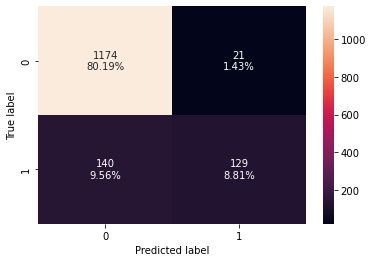

<IPython.core.display.Javascript object>

In [135]:
confusion_matrix_sklearn(bagging_wt, X_test, y_test)

In [136]:
bagging_wt_model_train_perf = model_performance_classification_sklearn(
    bagging_wt, X_train, y_train
)
print("Training performance \n", bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0   0.99297  0.967643   0.995246  0.98125


<IPython.core.display.Javascript object>

In [137]:
bagging_wt_model_test_perf = model_performance_classification_sklearn(
    bagging_wt, X_test, y_test
)
print("Testing performance \n", bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.890027  0.479554       0.86  0.615752


<IPython.core.display.Javascript object>

* Bagging classifier with a weighted decision tree is giving very good accuracy and prediction but is not able to generalize well on test data in terms of recall.

### Random Forest

In [138]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

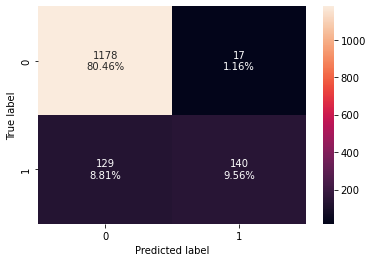

<IPython.core.display.Javascript object>

In [139]:
confusion_matrix_sklearn(rf, X_test, y_test)

In [140]:
rf_model_train_perf = model_performance_classification_sklearn(rf, X_train, y_train)
print("Training performance \n", rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


<IPython.core.display.Javascript object>

In [141]:
rf_model_test_perf = model_performance_classification_sklearn(rf, X_test, y_test)
print("Testing performance \n", rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.900273  0.520446    0.89172  0.657277


<IPython.core.display.Javascript object>

* Random Forest has performed well in terms of accuracy and precision, but it is not able to generalize well on the test data in terms of recall.

**Random forest with class weights**

In [142]:
rf_wt = RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)
rf_wt.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

<IPython.core.display.Javascript object>

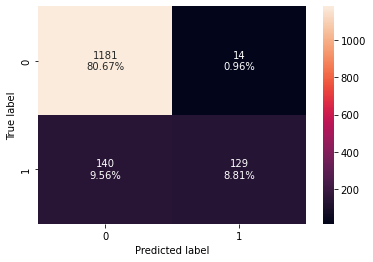

<IPython.core.display.Javascript object>

In [143]:
confusion_matrix_sklearn(rf_wt, X_test, y_test)

In [144]:
rf_wt_model_train_perf = model_performance_classification_sklearn(
    rf_wt, X_train, y_train
)
print("Training performance \n", rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


<IPython.core.display.Javascript object>

In [145]:
rf_wt_model_test_perf = model_performance_classification_sklearn(rf_wt, X_test, y_test)
print("Testing performance \n", rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.894809  0.479554   0.902098  0.626214


<IPython.core.display.Javascript object>

* There is not much improvement in metrics of weighted random forest as compared to the unweighted random forest.

### Observations on Models With default parameters:

* The decision tree and random forest classifier are overfitting the train data.
* The bagging classifier and random forest are giving similar performance in terms of accuracy but decision tree is giving better recall.
* The random forest classifier is giving better precision but low recall.

### Tuning Models

### Using GridSearch for Hyperparameter tuning model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

**Tuning Decision Tree**

In [146]:
%%time
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15, None],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

CPU times: total: 2min 52s
Wall time: 2min 52s


DecisionTreeClassifier(max_depth=18, min_impurity_decrease=0.0001,
                       random_state=1)

<IPython.core.display.Javascript object>

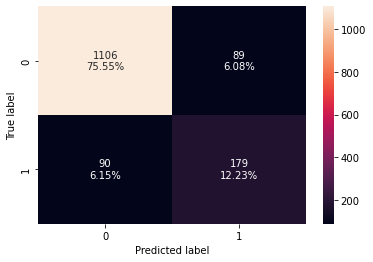

<IPython.core.display.Javascript object>

In [147]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [148]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
print("Training performance \n", dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.990041  0.950693   0.996769  0.973186


<IPython.core.display.Javascript object>

In [149]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
print("Testing performance \n", dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.877732  0.665428    0.66791  0.666667


<IPython.core.display.Javascript object>

* Overfitting in decision tree has reduced but the recall has also reduced.

**Tuning Bagging Classifier**

In [150]:
%%time
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

CPU times: total: 26.9 s
Wall time: 26.9 s


GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

<IPython.core.display.Javascript object>

In [151]:
## getting the best estimator
bagging_estimator = grid.best_estimator_
bagging_estimator.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.9, n_estimators=15, random_state=1)

<IPython.core.display.Javascript object>

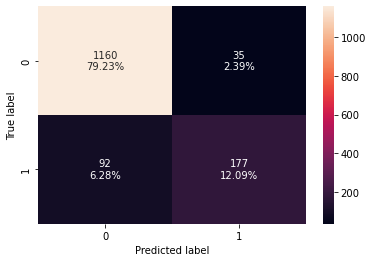

<IPython.core.display.Javascript object>

In [152]:
confusion_matrix_sklearn(bagging_estimator, X_test, y_test)

In [153]:
bagging_estimator_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator, X_train, y_train
)
print("Training performance \n", bagging_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.997364  0.987673   0.998442  0.993029


<IPython.core.display.Javascript object>

In [154]:
bagging_estimator_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator, X_test, y_test
)
print("Testing performance \n", bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.913251  0.657993   0.834906  0.735967


<IPython.core.display.Javascript object>

* This model is performing little better than the previous ones. But Recall on Test has to increased some more. 

**Tuning Random Forest**

* Using RandomizedSearchCV with iteration to improve the performance timing.

In [155]:
%%time
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [30,70,110,150],
        "min_samples_leaf": np.arange(1,6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5, n_iter=50)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

CPU times: total: 2min 1s
Wall time: 2min 1s


RandomForestClassifier(max_features=0.7, n_estimators=110, random_state=1)

<IPython.core.display.Javascript object>

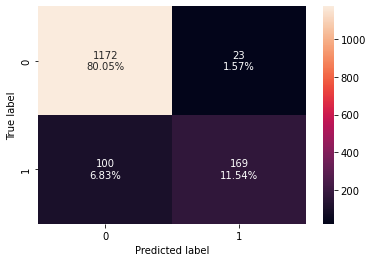

<IPython.core.display.Javascript object>

In [156]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [157]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance \n", rf_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


<IPython.core.display.Javascript object>

In [158]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance \n", rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.915984  0.628253   0.880208  0.733189


<IPython.core.display.Javascript object>

* Random forest after tuning has given almost same performance as un-tuned random forest.

### Comparing all the models

In [159]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        bagging_model_train_perf.T,
        bagging_wt_model_train_perf.T,
        rf_model_train_perf.T,
        rf_wt_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        bagging_estimator_model_train_perf.T,
        rf_estimator_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree  Bagging Classifier  Weighted Bagging Classifier  \
Accuracy             1.0            0.993263                     0.992970   
Recall               1.0            0.969183                     0.967643   
Precision            1.0            0.995253                     0.995246   
F1                   1.0            0.982045                     0.981250   

           Random Forest Classifier  Weighted Random Forest Classifier  \
Accuracy                        1.0                                1.0   
Recall                          1.0                                1.0   
Precision                       1.0                                1.0   
F1                              1.0                                1.0   

           Decision Tree Estimator  Bagging Estimator  Random Forest Estimator  
Accuracy                  0.990041           0.997364                      1.0  
Recall                    0.950693           0.987673                      1.0  
Precision                 0.996769           0.998442                      1.0  
F1                        0.973186           0.993029                      1.0

<IPython.core.display.Javascript object>

In [160]:
# training performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        bagging_model_test_perf.T,
        bagging_wt_model_test_perf.T,
        rf_model_test_perf.T,
        rf_wt_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        bagging_estimator_model_test_perf.T,
        rf_estimator_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree  Bagging Classifier  Weighted Bagging Classifier  \
Accuracy        0.855191            0.907104                     0.890027   
Recall          0.594796            0.583643                     0.479554   
Precision       0.608365            0.867403                     0.860000   
F1              0.601504            0.697778                     0.615752   

           Random Forest Classifier  Weighted Random Forest Classifier  \
Accuracy                   0.900273                           0.894809   
Recall                     0.520446                           0.479554   
Precision                  0.891720                           0.902098   
F1                         0.657277                           0.626214   

           Decision Tree Estimator  Bagging Estimator  Random Forest Estimator  
Accuracy                  0.877732           0.913251                 0.915984  
Recall                    0.665428           0.657993                 0.628253  
Precision                 0.667910           0.834906                 0.880208  
F1                        0.666667           0.735967                 0.733189

<IPython.core.display.Javascript object>

### Insights on Bagging Techniques

**Decision Tree:**

* With default parameters, its over fitting.
* After tuning, the test Recall slighly increased compare to other model but Precision and F1 are also decreased.

**Bagging Classifier:**

* Bagging classifier performed better than Decision Tree.
* Bagging Classifier performed well on training and test set.
* Weighted Bagging Classifier gave almost slight less Recall than Bagging Classifier.
* Bagging Classifier after tuning, the test Recall has slighly increased.

**Random Forest:**

* The Random Forest, Weighted Random Forest,Tuned Random Forest all models are overfitting the training data.
* The Tuned Random Forest has better test recall compared to Random forest and Weighted Random forest.

**Comparing all the 3 models:**

* The Tuned Decision Tree has a better test Recall compared to other models but its f1-score is less.
* The Tuned Random Forest is giving the highest f1-score on the test data but is overfitting the training data.
* The Bagging Classifier has not overfit on training data. It has a better test Recall and f1-score on test data.
* So the tuned Bagging Classifier is giving more generalized performance as compared to the Tuned Random Forest.

**Model performance improvement:**

* Final results depend on the parameters used/checked using GridSearchCV.
* The model performance will be improved by better parameters which may result in a better accuracy and recall.
* Feature importance also gives the most important factors in identifying potential customer who will buy package.

### Feature importance of Random Forest

In [161]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        rf.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                 Imp
MonthlyIncome               0.180541
Age                         0.169866
NumberOfTrips               0.088767
Passport_1                  0.079868
PreferredPropertyStar       0.054695
NumberOfChildrenVisiting    0.045662
NumberOfPersonVisiting      0.039166
Designation_Executive       0.039095
Gender_Male                 0.034546
TypeofContact_Self Enquiry  0.033618
CityTier_3                  0.032407
MaritalStatus_Single        0.030195
OwnCar_1                    0.028755
Occupation_Small Business   0.021957
Occupation_Salaried         0.021507
MaritalStatus_Married       0.020999
MaritalStatus_Unmarried     0.018123
Designation_Manager         0.016943
Occupation_Large Business   0.016080
Designation_Senior Manager  0.011833
CityTier_2                  0.011333
Designation_VP              0.004044


<IPython.core.display.Javascript object>

In [162]:
feature_names = X_train.columns

<IPython.core.display.Javascript object>

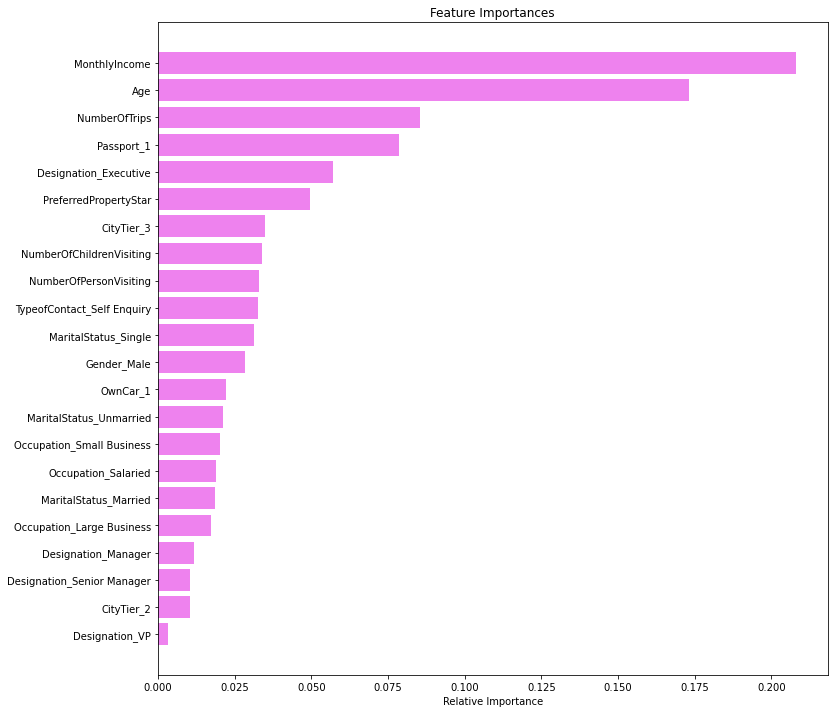

<IPython.core.display.Javascript object>

In [163]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Monthly income is the most important feature for prediction followed by Age and NumberOfTrips.

## Boosting - Model Building <a class="anchor" id="boost"></a>

### AdaBoost Classifier

In [164]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

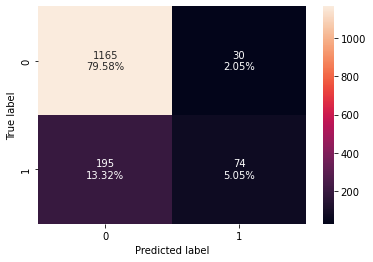

<IPython.core.display.Javascript object>

In [165]:
# Creating confusion matrix
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [166]:
# Calculating different metrics
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print(ab_classifier_model_train_perf)

   Accuracy    Recall  Precision        F1
0  0.846807  0.309707   0.728261  0.434595


<IPython.core.display.Javascript object>

In [167]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
print(ab_classifier_model_test_perf)

   Accuracy    Recall  Precision        F1
0  0.846311  0.275093   0.711538  0.396783


<IPython.core.display.Javascript object>

### Gradient Boosting Classifier

In [168]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

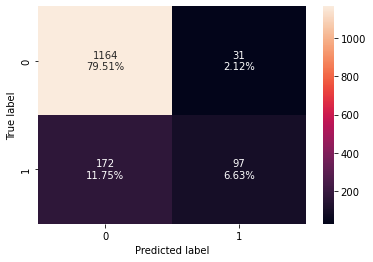

<IPython.core.display.Javascript object>

In [169]:
# Creating confusion matrix
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [170]:
# Calculating different metrics
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance:\n", gb_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.877856  0.436055   0.847305  0.575788


<IPython.core.display.Javascript object>

In [171]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
print("Testing performance:\n", gb_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.861339  0.360595   0.757812  0.488665


<IPython.core.display.Javascript object>

### XGBoost Classifier

In [172]:
# Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1, ...)

<IPython.core.display.Javascript object>

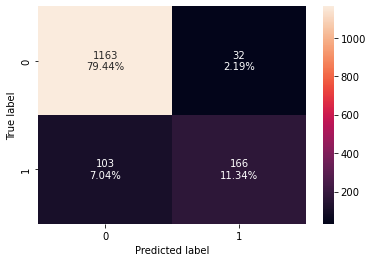

<IPython.core.display.Javascript object>

In [173]:
# Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [174]:
# Calculating different metrics
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
print("Training performance:\n", xgb_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.995899  0.978428        1.0  0.989097


<IPython.core.display.Javascript object>

In [175]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
print("Testing performance:\n", xgb_classifier_model_test_perf)

Testing performance:
    Accuracy  Recall  Precision        F1
0  0.907787  0.6171   0.838384  0.710921


<IPython.core.display.Javascript object>

**With default parameters:**
- XGBoost classifier has better test accuracy among these 3 models.
- Adaboost has least test accuracy and test recall.

## Hyperparameter Tuning

### AdaBoost Classifier

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- Some important hyperparamters are:
    - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [176]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.3000000000000003, n_estimators=100,
                   random_state=1)

<IPython.core.display.Javascript object>

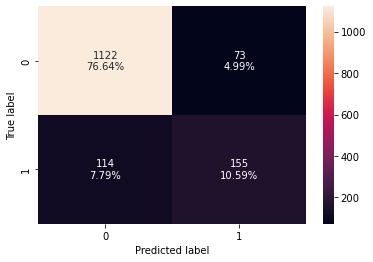

<IPython.core.display.Javascript object>

In [177]:
# Creating confusion matrix
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [178]:
# Calculating different metrics
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
print(abc_tuned_model_train_perf)

   Accuracy    Recall  Precision        F1
0  0.975103  0.909091   0.957792  0.932806


<IPython.core.display.Javascript object>

In [179]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print(abc_tuned_model_test_perf)

   Accuracy    Recall  Precision        F1
0  0.872268  0.576208   0.679825  0.623742


<IPython.core.display.Javascript object>

### Insights
- The model is overfitting the train data as train accuracy is much higher than the test accuracy.
- The model has low test recall. This implies that the model is not good at identifying the potential customer.

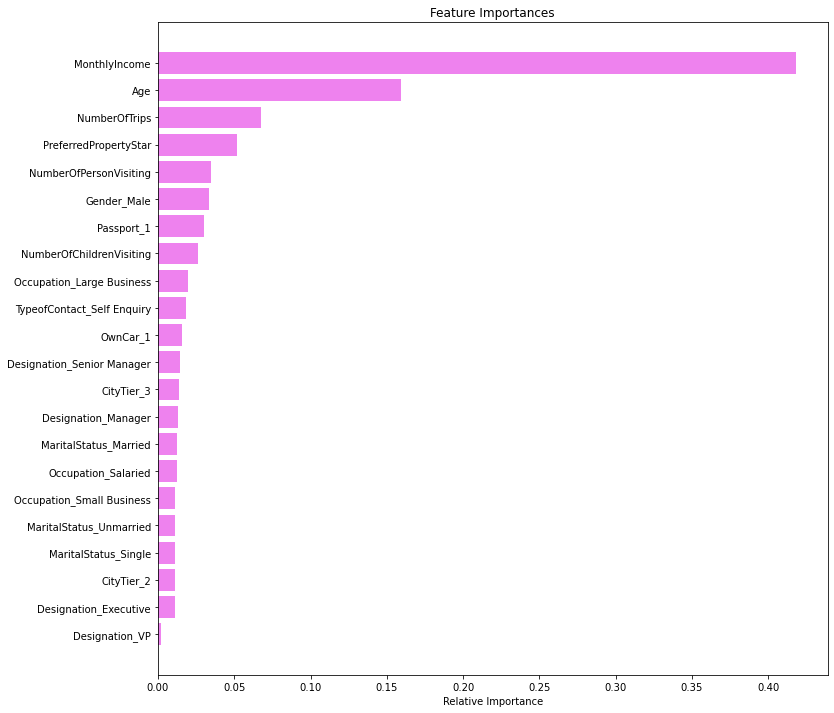

<IPython.core.display.Javascript object>

In [180]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Gradient Boosting Classifier

- Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.

**Let's try using AdaBoost classifier as the estimator for initial predictions**

In [181]:
gbc_init = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)
gbc_init.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

<IPython.core.display.Javascript object>

In [182]:
# Calculating different metrics
gbc_init_model_train_perf = model_performance_classification_sklearn(
    gbc_init, X_train, y_train
)
print(gbc_init_model_train_perf)
##Test metrics
gbc_init_model_test_perf = model_performance_classification_sklearn(
    gbc_init, X_test, y_test
)
print(gbc_init_model_test_perf)

   Accuracy    Recall  Precision        F1
0  0.881078  0.440678   0.869301  0.584867
   Accuracy    Recall  Precision        F1
0  0.858607  0.345725       0.75  0.473282


<IPython.core.display.Javascript object>

**As compared to the model with default parameters:**

- The recall and F1 scores are still poor.
- Results are same as default gradient boosting and init = AdaBoostClassifier() to tune the gradient boosting model.

In [183]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [30, 50, 100, 150],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=150, random_state=1,
                           subsample=0.8)

<IPython.core.display.Javascript object>

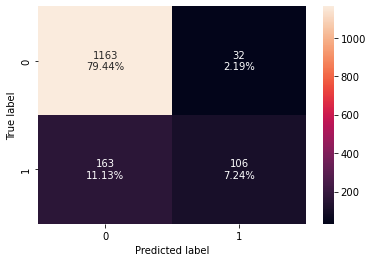

<IPython.core.display.Javascript object>

In [184]:
# Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [185]:
# Calculating different metrics
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance:\n", gbc_tuned_model_train_perf)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.893087  0.50077   0.887978  0.640394


<IPython.core.display.Javascript object>

In [186]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance:\n", gbc_tuned_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.866803  0.394052   0.768116  0.520885


<IPython.core.display.Javascript object>

* There is not much difference in the model performance after hyperparameter tuning.

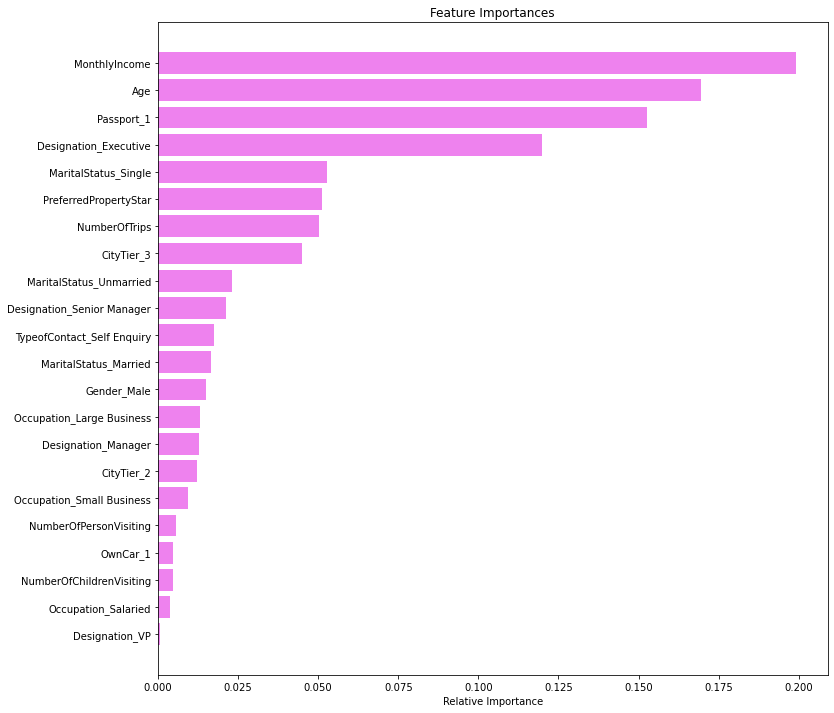

<IPython.core.display.Javascript object>

In [187]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- MonthlyIncome is the most important feature, followed by age and passport, as per the tuned gradient boosting model

### XGBoost Classifier

In [188]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10, 30, 50],
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": [0.05, 0.1, 0.2],
    "colsample_bytree": [0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1, ...)

<IPython.core.display.Javascript object>

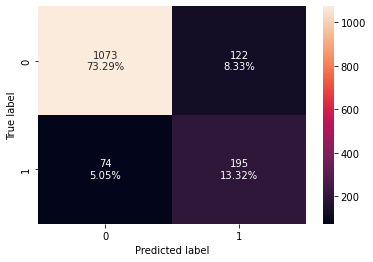

<IPython.core.display.Javascript object>

In [189]:
# Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [190]:
# Calculating different metrics
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance:\n", xgb_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.961336  0.983051    0.84058  0.90625


<IPython.core.display.Javascript object>

In [191]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Testing performance:\n", xgb_tuned_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0   0.86612  0.724907   0.615142  0.665529


<IPython.core.display.Javascript object>

### Insights
- The test accuracy of the model has reduced as compared to the model with default parameters but the recall has increased significantly and the model is able to identify most of the defaulters.
- Decreasing number of false negatives has increased the number of false positives here.
- The tuned model is not overfitting and generalizes well.

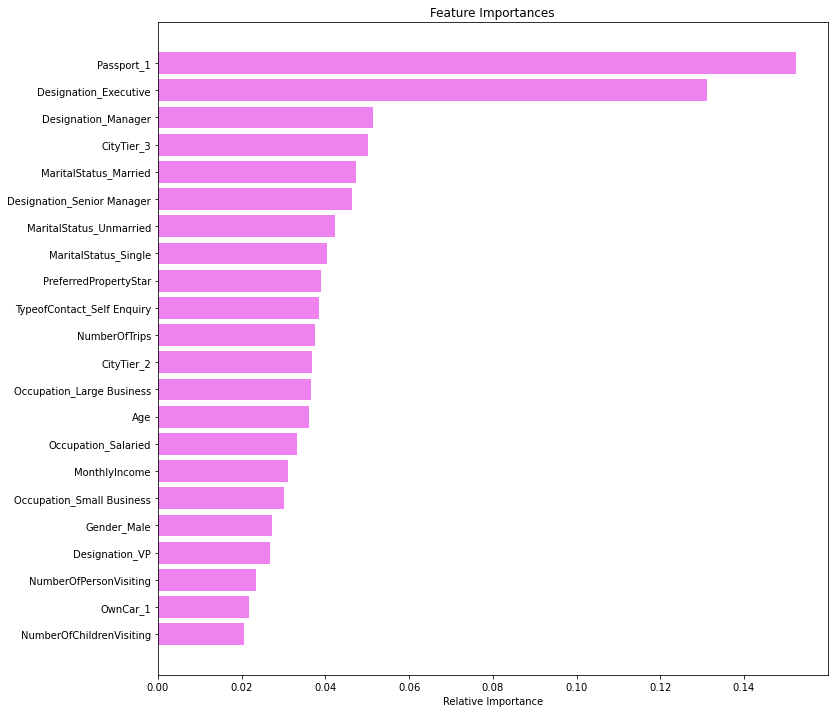

<IPython.core.display.Javascript object>

In [192]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The important features are very different in XGBoost model unlike AdaBoost and Gradient Boosting, where the most important feature is the Passport & Designation.

## Stacking Model

In [193]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ("Ada Boosting", abc_tuned),
    ("Gradient Boosting", gbc_tuned),
    ("Gradient with Ada initial", gbc_init),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Ada Boosting',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=1.3000000000000003,
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=150,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Gradient with A...
                                                 feature_types=None, gamma=0,
                                      

<IPython.core.display.Javascript object>

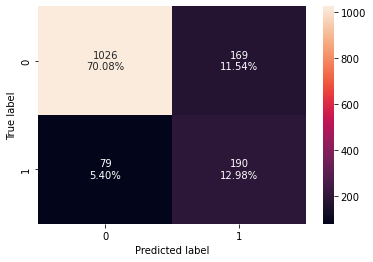

<IPython.core.display.Javascript object>

In [194]:
# Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [195]:
# Calculating different metrics
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
print("Training performance:\n", stacking_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.903339  0.899846   0.687868  0.779706


<IPython.core.display.Javascript object>

In [196]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
print("Testing performance:\n", stacking_classifier_model_test_perf)

Testing performance:
    Accuracy   Recall  Precision        F1
0  0.830601  0.70632   0.529248  0.605096


<IPython.core.display.Javascript object>

* The stacking classifier is not working great compare to XGBoost with slightly less overfitting.

## Comparing all models

In [197]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_init_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost with Ada Initial",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Adaboost Classifier  Adabosst Classifier Tuned  \
Accuracy              0.846807                   0.975103   
Recall                0.309707                   0.909091   
Precision             0.728261                   0.957792   
F1                    0.434595                   0.932806   

           Gradient Boost Classifier  Gradient Boost with Ada Initial  \
Accuracy                    0.877856                         0.881078   
Recall                      0.436055                         0.440678   
Precision                   0.847305                         0.869301   
F1                          0.575788                         0.584867   

           Gradient Boost Classifier Tuned  XGBoost Classifier  \
Accuracy                          0.893087            0.995899   
Recall                            0.500770            0.978428   
Precision                         0.887978            1.000000   
F1                                0.640394            0.989097   

           XGBoost Classifier Tuned  Stacking Classifier  
Accuracy                   0.961336             0.903339  
Recall                     0.983051             0.899846  
Precision                  0.840580             0.687868  
F1                         0.906250             0.779706

<IPython.core.display.Javascript object>

In [198]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_init_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost with Ada Initial",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Adaboost Classifier  Adabosst Classifier Tuned  \
Accuracy              0.846311                   0.872268   
Recall                0.275093                   0.576208   
Precision             0.711538                   0.679825   
F1                    0.396783                   0.623742   

           Gradient Boost Classifier  Gradient Boost with Ada Initial  \
Accuracy                    0.861339                         0.858607   
Recall                      0.360595                         0.345725   
Precision                   0.757812                         0.750000   
F1                          0.488665                         0.473282   

           Gradient Boost Classifier Tuned  XGBoost Classifier  \
Accuracy                          0.866803            0.907787   
Recall                            0.394052            0.617100   
Precision                         0.768116            0.838384   
F1                                0.520885            0.710921   

           XGBoost Classifier Tuned  Stacking Classifier  
Accuracy                   0.866120             0.830601  
Recall                     0.724907             0.706320  
Precision                  0.615142             0.529248  
F1                         0.665529             0.605096

<IPython.core.display.Javascript object>

### Insights on Boosting Techniques

The metrics used are Precision, Recall and F1. Recall or sensitivity is the ratio of all correctly identified positive cases divided by all actually positive cases. This project aim is to predic the potential customer who is going to purchase the newly introduced travel package. So, need to concentrate on Recall. 

**Comparing all the models:**

* AdaBoost and Gradient Boost with default parameter are not performing enough on both Test and Train data. 
* With tuned parameter, AdaBoost and Gradient Boost are performing enough on Train but not on Test data. 
* XGBoost with default parameter is over fitting on Train data and less performing on Test data.
* Stacking classifier works better both train and test data, but precision and F1 score are very low.

**Best Model**

* The XGBoost Tuned has a good Recall and accuracy. Even the f1-score and Precision are comparitively performing good. It is giving more generalized performance as compared to the other models.

**Model performance improvement:**

* Final results depend on the parameters used/checked using GridSearchCV.
* The model performance will be improved by better parameters which may result in a better accuracy and recall.
* Feature importance also gives the most important factors in identifying potential customer who will buy package.

## Conclusion <a class="anchor" id="con"></a>

### Bagging Model

* The Bagging Classifier has not overfit on training data. It has a better test Recall and f1-score on test data.

So the Bagging Classifier with tuned parameters is giving more generalized performance as compared to other bagging models.

### Boosting Model

* The XGBoost Tuned has given the second highest test f1-score on the test data and not overfitted the data. It has a good Recall and accuracy.

So XGBoost Tuned is giving more generalized performance as compared to the other boosting models.

Both the above models has given a more generalized performance. Bagging Classifier with tuned parameter is giving better result on accuracy, precision and f1 scores but XGBoost Tuned is giving better test value in Recall.

**So, by comparing the model performance of bagging and boosting. The Boosting model - XGBoost Tuned has been choosen as best model because of its performance.**

## Actionable Insights & Recommendations <a class="anchor" id="in-rec"></a>

  
Most important features that have an impact on Product taken: Designation, Income, Age and then passport, TierCity, Martialstatus.

Gender, number of children visiting, owning a car appears to be insignificant.

Customers with Designation as Executive should be the target customers for the company.

Large business occupation customers have higher chances of taking new package.

Customers monthly income in range of 15000- 25000, and age range 18-30 have higher chances of taking new package based on EDA.

Based on EDA, the marketing/sales people should also consider
  - Having a higher duration of pitch by salesman to the customer.
  - Getting a Pitch Satisfaction Score of 3 or 5.
  - Multiple follow ups with the customers.
  These factors are expected improve the chance of selling a package.
  
33% of customers with marital status single have purchased the package. So Travel company can concentrate on single for selling their packages.

Company should help and promote customers to get a passport, it is the important feature and increases the chances of customer accepting a package.

Comparing the contacts between company invite and Self enquiry, 21.8% of customers buy packages through the company invite and only 17.6% through Self enquiry. So marketing team can work on choosing more customers to provide invite.
